# Milestone 2 - Phase 1
`Raden Dissa Shafira | FTDS RMT-019 | 22/05/2023 `

# I. Introduction

Pada proyek ini akan dilakukan pembuatan model prediksi untuk mengklasifikasikan golongan mahasiswa yang berkemungkinan untuk lulus atau dikeluarkan dari institusi (*drop-out*). Dataset yang digunakan adalah dataset ["Predict Students' Dropout and Academic Success"](https://www.kaggle.com/datasets/thedevastator/higher-education-predictors-of-student-retention) yang mencakup berbagai faktor yang berkemungkinan dapat berpengaruh kepada kesuksesan mahasiswa; lingkungan, sosial ekonomi, serta kinerja akademik terkait dengan mahasiswa yang terdaftar di berbagai lembaga pendidikan tinggi diberbagai negara. Proyek ini dapat memberikan wawasan tentang faktor-faktor yang memengaruhi keberhasilan siswa dan dapat digunakan untuk memandu intervensi dan kebijakan--sehingga institusi dapat mengambil langkah-langkah yang tepat untuk mencegah mahasiswa putus sekolah.

**Problem Statement:**

Identifikasi dini terhadap mahasiswa yang berpotensi putus sekolah dapat membantu institusi pendidikan dalam menyediakan dukungan yang tepat guna meningkatkan peluang kesuksesan akademik mereka. Oleh karena itu, perlu dibangun sebuah model klasifikasi yang dapat memprediksi kemungkinan putus sekolah atau kesuksesan akademis mahasiswa berdasarkan data yang ada. Akan dilakukan percobaan terhadap beberapa model (Decision Tree, Random Forest, SVM-C, CatBoost, serta AdaBoost) untuk mendapatkan hasil model yang paling akurat. 


Dataset yang digunakan adalah dataset "Predict Students' Dropput and Academic Success" yang dapat ditemukan dari [sumber](https://www.kaggle.com/datasets/thedevastator/higher-education-predictors-of-student-retention) berikut. Dataset yang digunakan merupakan dataset yang ebrasal dari berbagai kumpulan data mahasiswa dari berbagai institusi. Dataset ini juga mencakup mahasiswa-mahasiswa yang terdaftar di berbagai gelar sarjana seperti; agronomi, desain, pendidikan, keperawatan, jurnalisme, manajemen, layanan sosial, dan teknologi. Berikut adalah penjelasan mengenai tiap kolom dataset:



| Column Name                       | Description                                                                                   | Data Type               |
|-----------------------------------|-----------------------------------------------------------------------------------------------|-------------------------|
| Marital status                    | The marital status of the student. 1 = Single, 2 = Married, 3 = Widower, 4 = Divorced, 5 = Facto union, 6 = Legally separated    | Categorical             |
| Application mode                  | The method of application used by the student.                                                | Categorical             |
| Application order                 | The order in which the student applied.                                                       | Numerical               |
| Course                            | The course taken by the student.                                                              | Categorical             |
| Daytime/evening attendance        | Whether the student attends classes during the day or in the evening.                         | Categorical-Binary      |
| Previous qualification            | The qualification obtained by the student before enrolling in higher education.               | Categorical-Ordinal     |
| Nationality                       | The nationality of the student.                                                               | Categorical             |
| Mother's qualification            | The qualification of the student's mother.                                                    | Categorical-Ordinal     |
| Father's qualification            | The qualification of the student's father.                                                    | Categorical-Ordinal     |
| Mother's occupation               | The occupation of the student's mother.                                                       | Categorical             |
| Father's occupation               | The occupation of the student's father.                                                       | Categorical             |
| Displaced                         | Whether the student is a displaced person.                                                    | Categorical-Binary      |
| Educational special needs         | Whether the student has any special educational needs.                                        | Categorical-Binary      |
| Debtor                            | Whether the student is a debtor.                                                              | Categorical-Binary      |
| Tuition fees up to date           | Whether the student's tuition fees are up to date.                                           | Categorical-Binary      |
| Gender                            | The gender of the student. 0 = Female, 1 = Male                                              | Categorical-Binary      |
| Scholarship holder                | Whether the student is a scholarship holder.                                                  | Categorical-Binary      |
| Age at enrollment                 | The age of the student at the time of enrollment.                                             | Numerical               |
| International                     | Whether the student is an international student.                                              | Categorical-Binary      |
| Curricular units 1st sem (credited)| The number of curricular units credited by the student in the first semester.                 | Numerical               |
| Curricular units 1st sem (enrolled)| The number of curricular units enrolled by the student in the first semester.                 | Numerical               |
| Curricular units 1st sem (evaluations)| The number of curricular units evaluated by the student in the first semester.              | Numerical               |
| Curricular units 1st sem (approved)| The number of curricular units approved by the student in the first semester.                 | Numerical               |


Pengertian lebih lanjut mengenai masing-masing kategori dapat ditemukan dari sumber riset data pada [link](https://www.mdpi.com/2306-5729/7/11/146) yang terpisah dari sumber unduh dataset. 

**Question and Assumptions:**

Dalam proyek ini juga akan ada beberapa pertanyaan dan asumsi yang menjadi ketertarikan dari proyek ini, yakni:
1. Apakah ada korelasi dari kolom-kolom atribut dengan target? Jika ada, apa saja serta apa asumsi dibalik korelasinya?
2. Apa argumen dalam menentukan menentukan model yang akan dipakai?
3. Dari model yang akan dibuat, bagaimana evaluasinya? Apa model serta parameter terbaik untuk mengolah data tersebut?
4. Apa kelebihan dan kekurangan dari model dalam sisi pendidikan dan perkembangan?
5. Apa yang dapat dikembangkan dari proyek ini (baik dalam modelling maupun proses lainnya)?

# II. Import Libraries
Berisi library yang akan digunakan dalam project.

In [800]:
# library math dan visualisasi
import sklearn
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 
from collections import Counter
import numpy as np


# feature engineering
from sklearn.model_selection import train_test_split
from imblearn.pipeline import Pipeline # menggunakan pipeline dari imblearn karena ingin menggunakan SMOTE
# selection
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import SelectKBest, f_classif 
from scipy.stats import chi2_contingency  
# transformation
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, FunctionTransformer # encoding dan scaling
from feature_engine.transformation import YeoJohnsonTransformer
from sklearn.compose import ColumnTransformer   
from feature_engine.outliers import Winsorizer  # untuk capping outlier
from imblearn.over_sampling import SMOTE # untuk imbalance data


# model
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from catboost import CatBoostClassifier

# evaluasi
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay, confusion_matrix, f1_score
from sklearn.metrics import roc_curve, auc,roc_auc_score
from sklearn.model_selection import GridSearchCV

# save model& inferencing
import pickle
import json

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
np.random.seed(66)

# III. Data Loading
Bagian ini berisikan data loading serta pengecekan mengenai banyak data, isi data, ukuran data, dan sebagainya untuk mengetahui bagian apa yang berpotensi untuk diamati lebih lanjut.

In [5]:
# loading data
df = pd.read_csv('h8dsft_P1M2_R_Dissa.csv')
# melihat jumlah baris dan kolom data
df.shape

(4424, 35)

In [3]:
# menampilkan 10 data pertama
df.head(10)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
5,2,12,1,17,0,12,1,22,27,10,...,0,5,17,5,11.500000,5,16.2,0.3,-0.92,Graduate
6,1,1,1,12,1,1,1,13,28,8,...,0,8,8,8,14.345000,0,15.5,2.8,-4.06,Graduate
7,1,9,4,11,1,1,1,22,27,10,...,0,5,5,0,0.000000,0,15.5,2.8,-4.06,Dropout
8,1,1,3,10,1,1,15,1,1,10,...,0,6,7,6,14.142857,0,16.2,0.3,-0.92,Graduate
9,1,1,1,10,1,1,1,1,14,5,...,0,6,14,2,13.500000,0,8.9,1.4,3.51,Dropout


In [4]:
# menampilkan 10 data terakhir
df.tail(10)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
4414,1,1,1,8,1,1,1,3,28,4,...,0,5,8,5,11.600000,0,9.4,-0.8,-3.12,Graduate
4415,4,12,1,12,1,12,1,22,27,7,...,0,7,12,3,11.083333,0,11.1,0.6,2.02,Dropout
4416,1,14,2,12,1,1,1,23,28,10,...,11,14,15,12,12.625000,1,7.6,2.6,0.32,Graduate
4417,1,1,1,5,1,1,1,1,1,10,...,0,6,6,6,13.500000,0,16.2,0.3,-0.92,Graduate
4418,1,15,1,5,1,14,1,3,28,4,...,5,9,10,7,13.142857,1,16.2,0.3,-0.92,Graduate
4419,1,1,6,15,1,1,1,1,1,6,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,15,1,1,19,1,1,10,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,12,1,1,1,22,27,10,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9,1,1,1,22,27,8,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate
4423,1,5,1,15,1,1,9,23,27,6,...,0,6,6,6,13.000000,0,12.7,3.7,-1.70,Graduate


In [6]:
# melihat informasi general data; tipe data serta jumlah data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

In [9]:
# melihat deskripsi serta tendensi sentral data
df.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,6.886980,1.727848,9.899186,0.890823,2.531420,1.254521,12.322107,16.455244,7.317812,7.819168,0.548373,0.011528,0.113698,0.880651,0.351718,0.248418,23.265145,0.024864,0.709991,6.270570,8.299051,4.706600,10.640822,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,5.298964,1.313793,4.331792,0.311897,3.963707,1.748447,9.026251,11.044800,3.997828,4.856692,0.497711,0.106760,0.317480,0.324235,0.477560,0.432144,7.587816,0.155729,2.360507,2.480178,4.179106,3.094238,4.843663,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,2.000000,3.000000,5.000000,5.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,19.000000,0.000000,0.000000,5.000000,6.000000,3.000000,11.000000,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,8.000000,1.000000,10.000000,1.000000,1.000000,1.000000,13.000000,14.000000,6.000000,8.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,20.000000,0.000000,0.000000,6.000000,8.000000,5.000000,12.285714,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,12.000000,2.000000,13.000000,1.000000,1.000000,1.000000,22.000000,27.000000,10.000000,10.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,25.000000,0.000000,0.000000,7.000000,10.000000,6.000000,13.400000,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,18.000000,9.000000,17.000000,1.000000,17.000000,21.000000,29.000000,34.000000,32.000000,46.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,70.000000,1.000000,20.000000,26.000000,45.000000,26.000000,18.875000,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


Diketahui bahwa data terdiri dari 4424 baris serta 35 kolom. Seluruh data sudah memiliki nilai yang telah ditransformasikan menjadi angka. Kolom yang akan kami gunakan sebagai target adalah kolom 'Target' dengan value 'Graduated' (lulus/ sukses secara akademis), 'Dropout' (dikeluarkan/ putus sekolah), dan 'Enrolled' (sedang mengikuti/ masih terdaftar)

Untuk selanjutnya data akan dieksplorasi dengan lebih mendetail. 

# IV. EDA

Bagian ini berisikan eksplorasi data pada dataset dimana akan dilakukan pembuatan query, grouping, serta visualisasi data. Bagian ini akan menekankan deskripsi serta keterhubungan data secara prinsip.

- Melihat deskripsi data (tendensi sentral, maksimal, minimum, dan sebagainya)
- Melihat persebaran data pada dataset berbasis numerikal, dan melihat rasio data kategorikal.
- Melihat korelasi fitur dengan data target.
- Menentukan model yang akan dipakai melihat dari pola korelasi fitur dan target.

### Data Cleaning

**Missing Values**

In [10]:
# melihat apakah ada data terduplikasi
# bila tidak ada, tidak dilakukan proses apapun

df.duplicated().sum()

0

In [11]:
# melihat jika ada data yang hilang
df.isnull().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International                                     0
Curricular u

Data sudah tersaring dari missing values serta kolom yang tidak diinginkan.

**Early Feature Selection**

Akan dilakukan penyingkiran kolom yang dianggap sudah menjadi perwakilan kolom lain. 

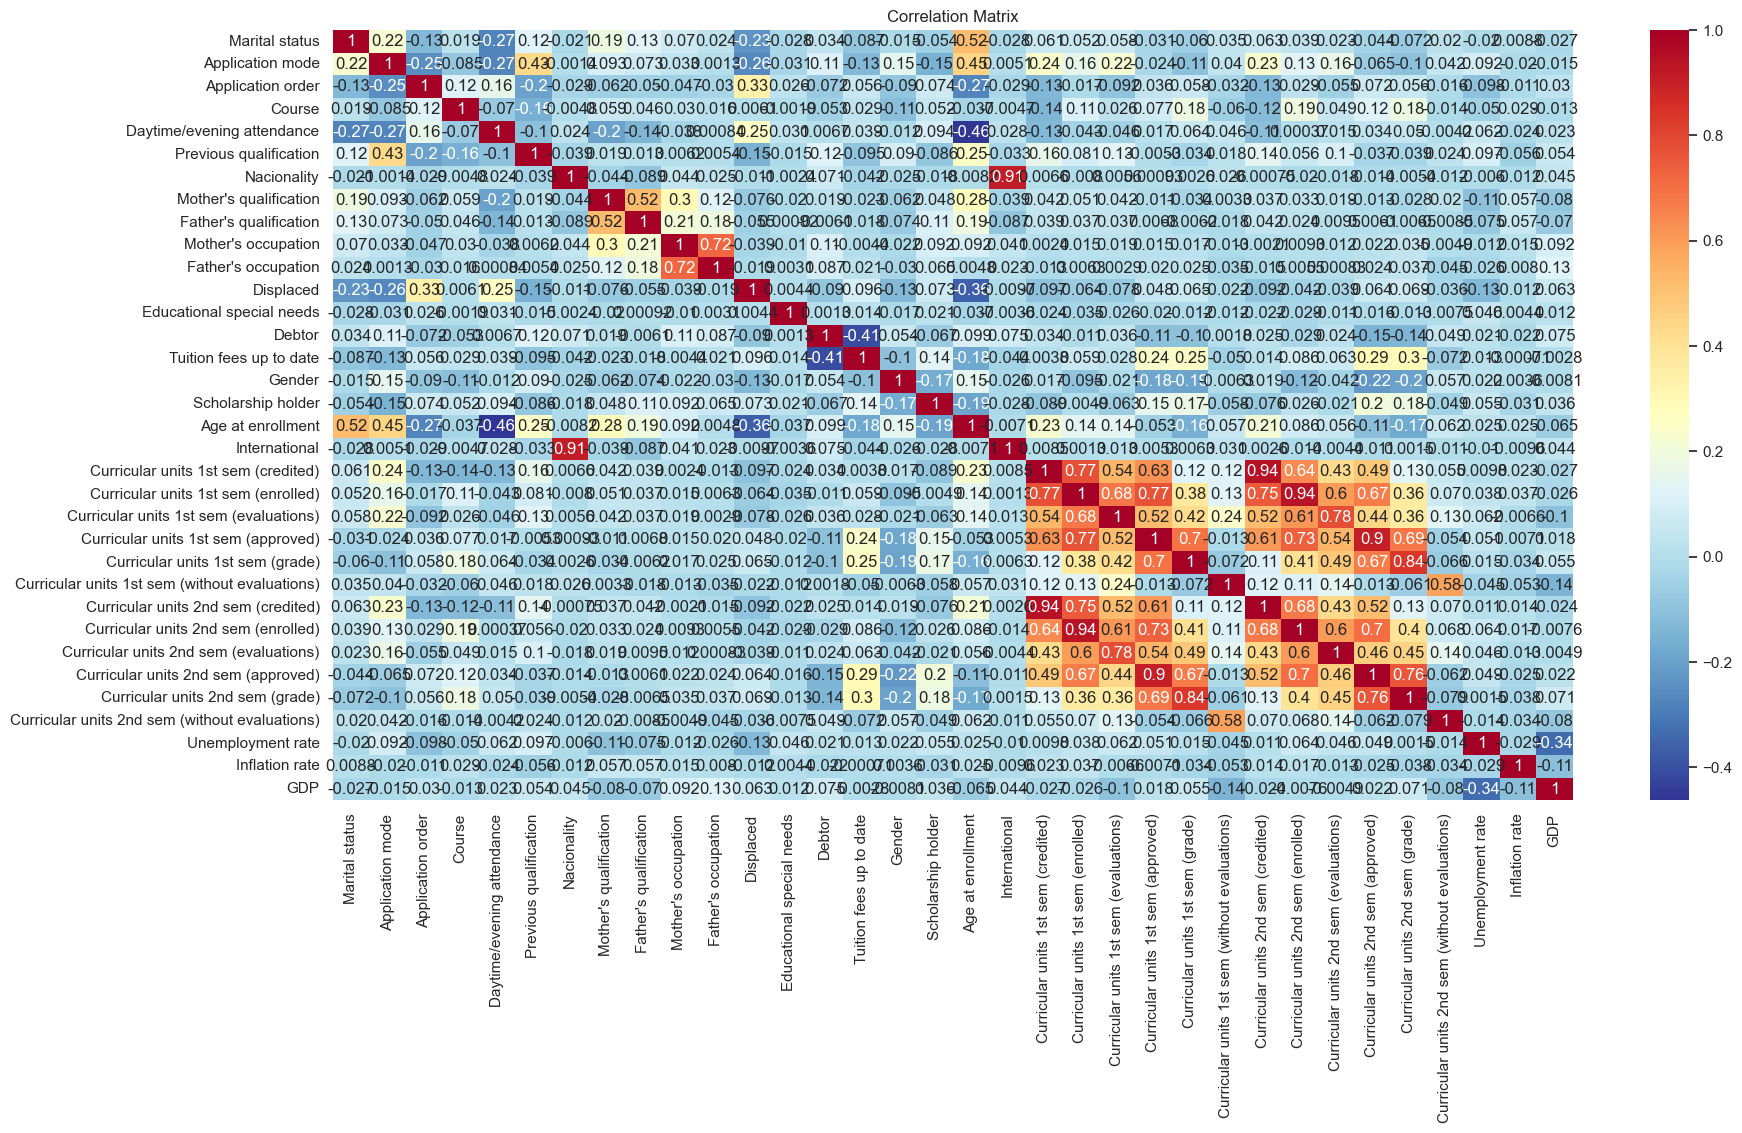

In [694]:
# melihat persebaran korelasi pada data yang sudah di encode
corr = df.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(corr, annot=True, cmap='RdYlBu_r')
plt.title('Correlation Matrix')
plt.show()

Diketahui bahwa beberapa kolom terutama kolom numerikal memiliki korelasi yang tinggi terhadap satu sama lain. Kolom-kolom yang akan disingkirkan beserta alasannya adalah:

- 'Curricular units 1st sem (without evaluations)' karena dianggap telah diwakilkan oleh 'Curricular units 1st sem (evaluations)'
- 'Curricular units 2nd sem (without evaluations)' karena dianggap telah diwakilkan oleh 'Curricular units 1st sem (evaluations)'
- 'Application mode' dan 'Application order' karena hanya merupakan metode siswa memasuki institusi. Selain itu, [sumber](https://www.mdpi.com/2306-5729/7/11/146) juga menyatakan bahwa fitur tersebut bukan merupakan fitur yang memiliki banyak pengaruh untuk modelling pada kolom 'Target'--namun tetap kita simpan untuk diteliti lebih lanjut pada bagian eksplorasi data. 

In [40]:
# menyimpan kolom yang akan di-drop ke dalam variabel
dropped_cols = ['Curricular units 1st sem (without evaluations)','Curricular units 2nd sem (without evaluations)','Application mode','Application order']

# drop semua kolom dropped_columns
df_drop = df.copy() # membuat copy
df_drop = df_drop.drop(['Curricular units 1st sem (without evaluations)','Curricular units 2nd sem (without evaluations)','Application mode','Application order'], axis=1)
df_drop.head(2)

,Marital status,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Unemployment rate,Inflation rate,GDP,Target
0,1,2,1,1,1,13,10,6,10,1,0,0,1,1,0,20,0,0,0,0,0,0.0,0,0,0,0,0.000000,10.8,1.4,1.74,Dropout
1,1,11,1,1,1,1,3,4,4,1,0,0,0,1,0,19,0,0,6,6,6,14.0,0,6,6,6,13.666667,13.9,-0.3,0.79,Graduate


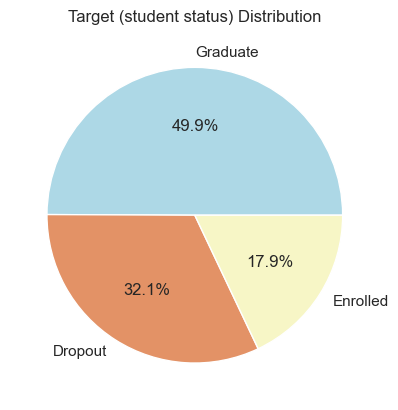

In [782]:
# memvisualisasikan rasio target 
target_counts = df_drop['Target'].value_counts() # count
custom_palette = ['#add8e6', '#e39266',"#f7f6c6"]
# membuat pie chard
plt.pie(target_counts, labels=target_counts.index, autopct='%1.1f%%', colors=custom_palette)
plt.title('Target (student status) Distribution')
plt.show()

Berikutnya akan dilakukan penyingkiran baris pada target, yakni 'Enrolled' (sedang mengikuti/ telah terdaftar) yang kami anggap belum menjadi fokusan dari proyek ini. Kami hanya akan memprediksi mahasiswa 'Graduate' dan 'Dropout' untuk mendapatkan hasil klasifikasi yang lebih kontras. Selain itu, 'Enrolled' juga memiliki jumlah data yang lebih sedikit, sehingga mungkin tidak terlalu bermasalah bila berkurang karena bukan berupakan data mayoritas. Sebagai gantinya, kolom ini akan dijadikan set `data inferensial` dimana pada akhirnya kami akan mencoba memprediksi mahasiswa dengan status 'Enrolled' tersebut apakah lebih memiliki tendensi untuk termasuk dalam kategori akan 'Graduated' atau akan 'Dropout'. 

In [42]:
# membuat query baru untuk data inference
df_inf = df_drop[df_drop['Target'] == 'Enrolled'].copy()

#membuat query baru tanpa enroll
df_drop_enroll = df_drop[df_drop['Target'] != 'Enrolled'].copy()
df_drop_enroll.shape

(3630, 31)

Setelah diterapkan penyingkiran beberapa baris dan kolom, dataset kini tersisa 3630 baris serta 31 kolom.

### Split Numerical Categorical

Berdasarkan deskripsi data yang telah dicantumkan pada bagian Introduction, kami sudah dapat mengasumsikan kolom mana saja yang merupakan kolom numerikal dan kategorikal. Oleh karena itu akan dilakukan pemisahan kolom sesuai masing-masing tipe data. 

In [163]:
# definisi kolom terfilter
filt_cols = df_drop_enroll.columns
# mengelompokkan kolom num
num_cols= ['GDP', 'Inflation rate', 'Unemployment rate','Curricular units 1st sem (credited)','Age at enrollment',
            'Curricular units 1st sem (enrolled)',
            'Curricular units 1st sem (evaluations)',
            'Curricular units 1st sem (approved)',
            'Curricular units 1st sem (grade)',
            'Curricular units 2nd sem (credited)',
            'Curricular units 2nd sem (enrolled)',
            'Curricular units 2nd sem (evaluations)',
            'Curricular units 2nd sem (approved)',
            'Curricular units 2nd sem (grade)', ]
# mengelompokkan kolom cat(selain num)
cat_cols = df_drop_enroll.drop(num_cols, axis=1).columns.tolist() # tidak drop target untuk eksplor
cat_cols_feature = df_drop_enroll.drop(num_cols + ['Target'], axis=1).columns.tolist() # drop target untuk model

**Categorical**

In [695]:
# karena data kategorikal sudah dilakukan encoding dari dataset asli, perlu dilakukan pembuatan tabel describe secara manual
# membuat dataframe kosong
description_cat = pd.DataFrame(columns=['Column', 'Unique Values', 'Count Unique', 'Top Value'])

# iterasi masing-masing kolom terhadap rumus count, top, dll
for column in cat_cols:
    unique_values = df_drop_enroll[column].unique()
    count = df_drop_enroll[column].nunique()
    top_value = df_drop_enroll[column].value_counts().idxmax()
    description_cat = description_cat.append({'Column': column, 'Unique Values': unique_values, 'Count Unique': count, 'Top Value': top_value}, ignore_index=True)

# show
description_cat

,Column,Unique Values,Count Unique,Top Value
0,Marital status,"[1, 2, 4, 3, 5, 6]",6,1
1,Course,"[2, 11, 5, 15, 3, 17, 12, 10, 14, 16, 6, 8, 9,...",17,12
2,Daytime/evening attendance,"[1, 0]",2,1
3,Previous qualification,"[1, 12, 16, 8, 14, 3, 15, 2, 4, 9, 17, 11, 6, ...",17,1
4,Nacionality,"[1, 15, 3, 14, 12, 18, 5, 11, 17, 4, 9, 16, 10...",19,1
5,Mother's qualification,"[13, 1, 22, 23, 3, 27, 2, 19, 4, 10, 25, 7, 5,...",29,1
6,Father's qualification,"[10, 3, 27, 28, 1, 14, 4, 24, 29, 2, 5, 9, 7, ...",34,27
7,Mother's occupation,"[6, 4, 10, 8, 5, 2, 16, 1, 7, 3, 12, 9, 20, 13...",29,10
8,Father's occupation,"[10, 4, 8, 11, 6, 5, 9, 2, 22, 7, 1, 3, 12, 39...",42,10
9,Displaced,"[1, 0]",2,1


Secara garis besar terlihat bahwa 'Marital status', 'Course', serta 'Nacionality' merupakan kolom kategorikal nominal. Kolom yag berhubungan dengan kualifikasi merupakan kolom ordinal yang memiliki tingkatan, sementara sisanya merupakan kolom nominal biner.

**Numerical**

In [59]:
# mengelompokkkan dan melihat deskripsi kolom numerikal
df_num = df[num_cols]
df_num.describe()

,GDP,Inflation rate,Unemployment rate,Curricular units 1st sem (credited),Age at enrollment,Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade)
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,0.001969,1.228029,11.566139,0.709991,23.265145,6.270570,8.299051,4.706600,10.640822,0.541817,6.232143,8.063291,4.435805,10.230206
std,2.269935,1.382711,2.663850,2.360507,7.587816,2.480178,4.179106,3.094238,4.843663,1.918546,2.195951,3.947951,3.014764,5.210808
min,-4.060000,-0.800000,7.600000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-1.700000,0.300000,9.400000,0.000000,19.000000,5.000000,6.000000,3.000000,11.000000,0.000000,5.000000,6.000000,2.000000,10.750000
50%,0.320000,1.400000,11.100000,0.000000,20.000000,6.000000,8.000000,5.000000,12.285714,0.000000,6.000000,8.000000,5.000000,12.200000
75%,1.790000,2.600000,13.900000,0.000000,25.000000,7.000000,10.000000,6.000000,13.400000,0.000000,7.000000,10.000000,6.000000,13.333333
max,3.510000,3.700000,16.200000,20.000000,70.000000,26.000000,45.000000,26.000000,18.875000,19.000000,23.000000,33.000000,20.000000,18.571429


Melihat garis besar deskripsi data numerikal, dapat ditemukan ada beberapa kolom yang memiliki nilai minus yakni 'GDP' dan 'Inflation Rate'. Hal tersebut merupakan hal yang wajar dan dapat dijelaskan. Berikut adalah asumsi angka minus dari kedua kolom tersebut; 'GDP' negatif biasanya menunjukkan kontraksi dalam perekonomian, biasa disebut sebagai resesi ekonomi (kondisi yang tidak diinginkan); sementara 'Inflation Rate' negatif yang dapat juga disebut 'deflasi' yang merupakan peningkatan nilai mata uang negara atau penurunan harga dalam negara (dapat memberikan indikasi positif, namun juga memiliki resiko negatif seperti mengganggu siklus bisnis) (sumber: [umsu.ac.id](https://umsu.ac.id/deflasi-adalah/#:~:text=Deflasi%20adalah%20merupakan%20fenomena%20penurunan,beli%20uang%20yang%20nilainya%20turun.)). Faktor-faktor ini, bisa jadi atau bisa juga tidak berhubungan dengan indikasi mahasiswa untuk putus sekolah atau lulus.

### Visualization

**Categorical**

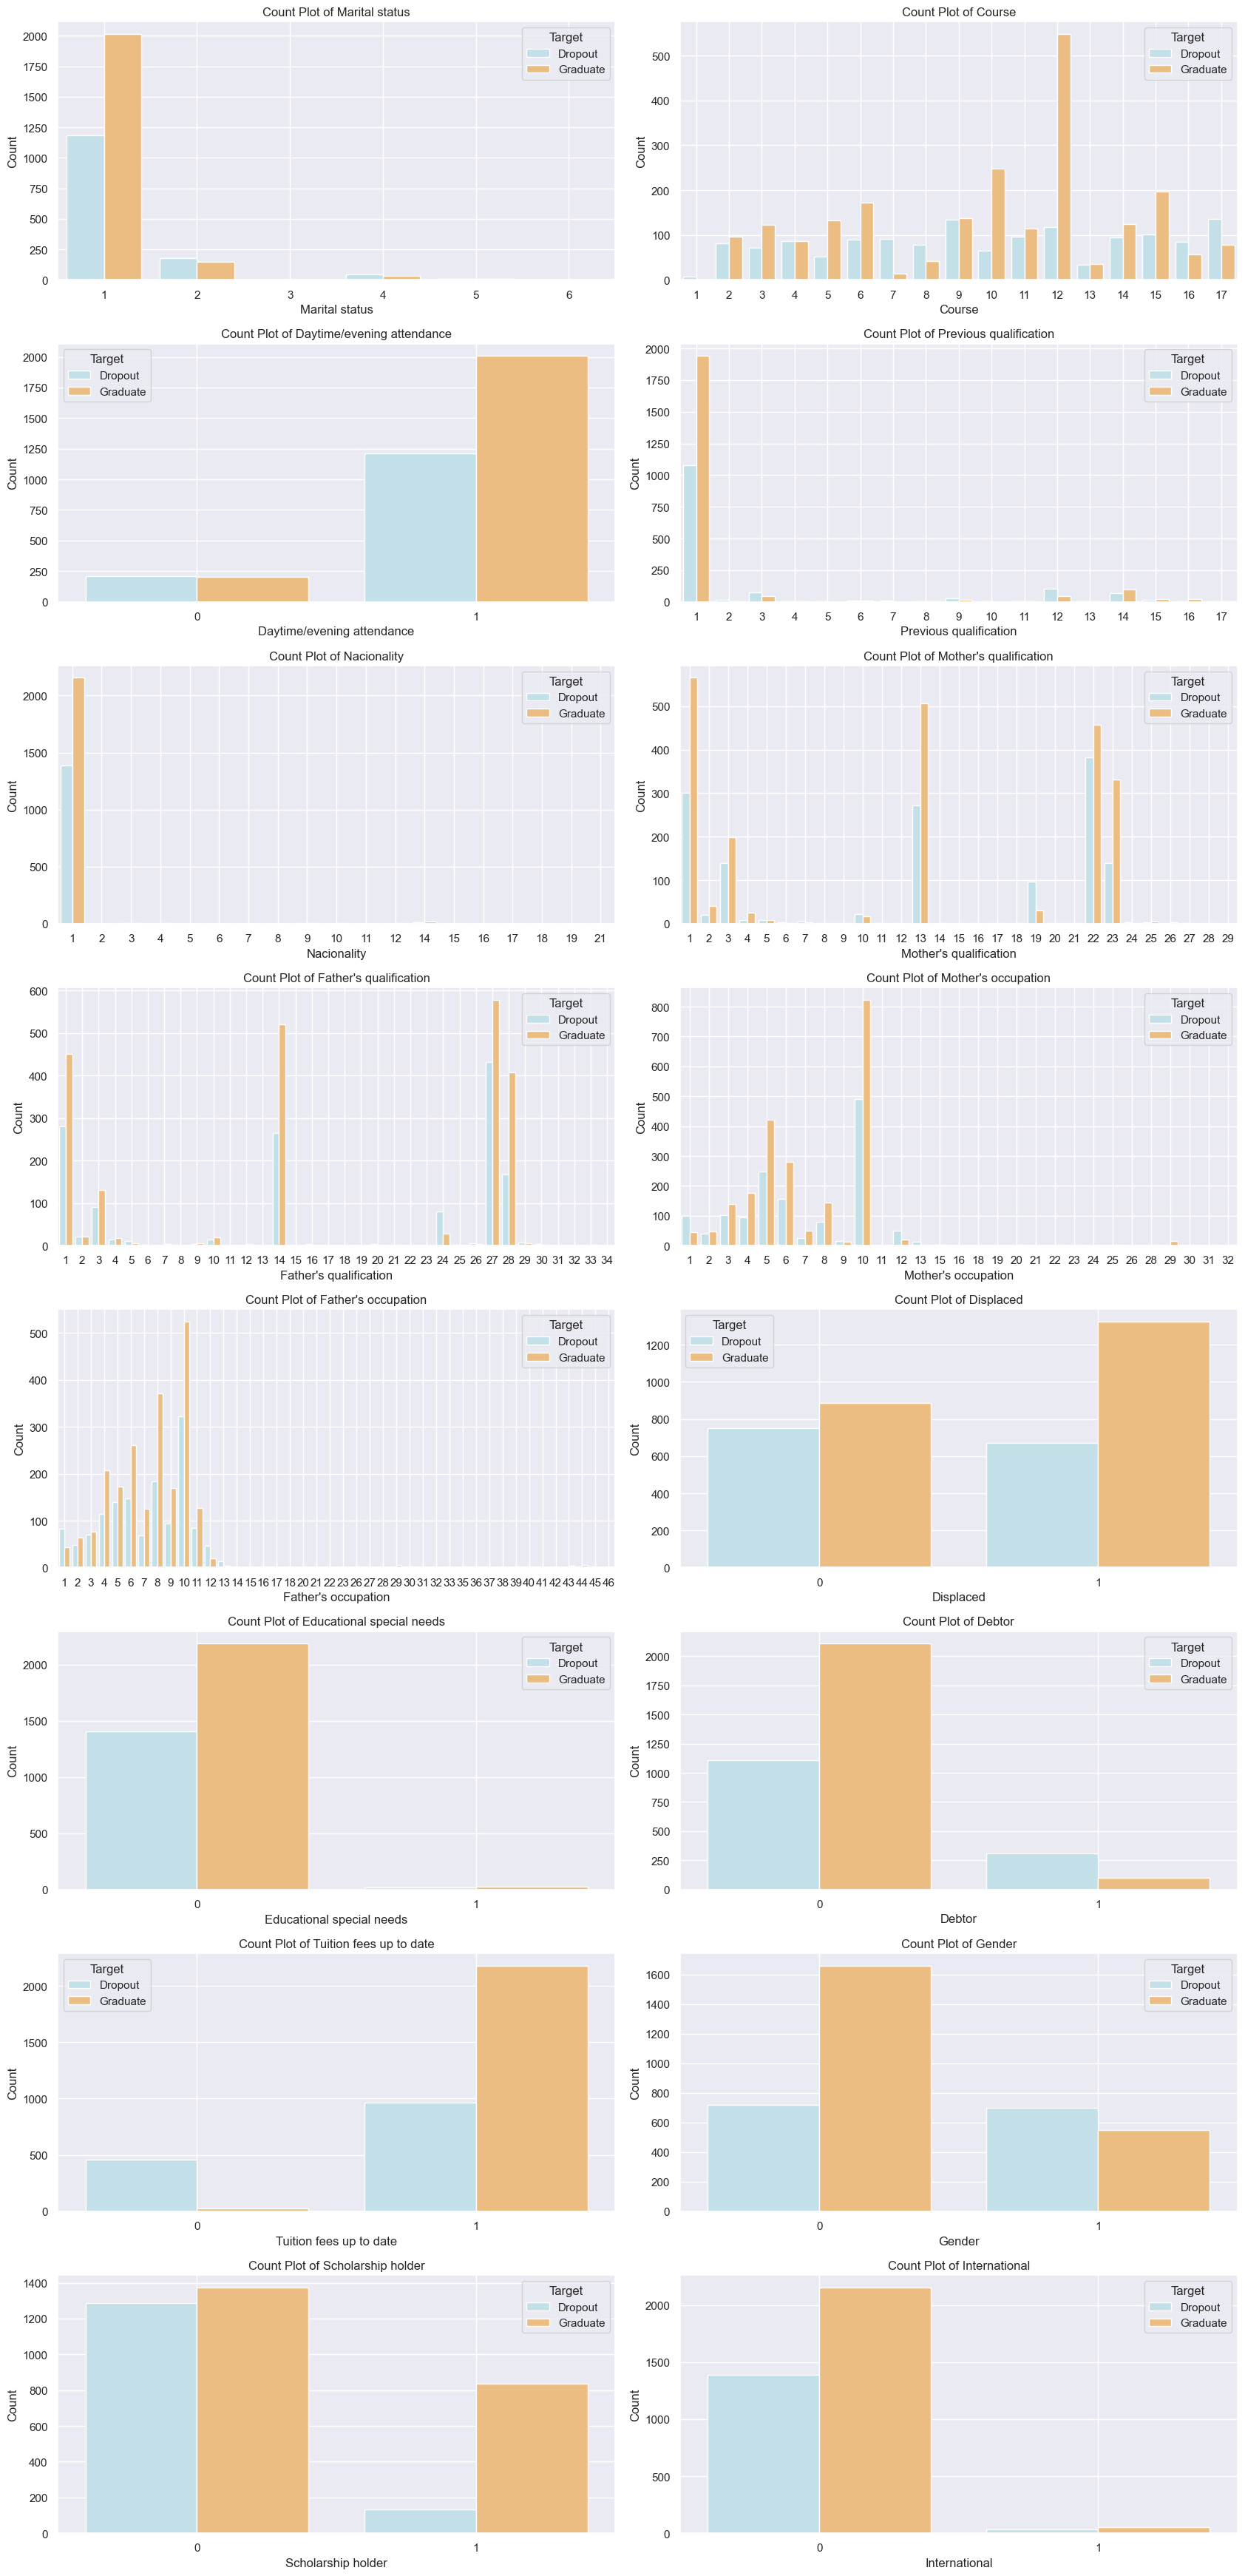

In [718]:
# Membuat canvas
fig, axes = plt.subplots(8, 2, figsize=(17, 35))

# Loop through cat_cols
for i, column in enumerate(cat_cols):
    row = i // 2  # Nomor baris subplot
    col = i % 2   # Nomor kolom subplot

    if row < 8:  # Add a condition to handle extra columns
        # show count plot
        ax = sns.countplot(x=column, data=df_drop_enroll, hue='Target', palette='RdYlBu_r', ax=axes[row, col])
        ax.set_title(f'Count Plot of {column}')
        ax.set_xlabel(column)
        ax.set_ylabel('Count')
        ax.set_xticklabels(ax.get_xticklabels())
        ax.grid(True, color='white')  # grid untuk memudahkan visualisasi

# show plot
sns.set_style('darkgrid')
plt.tight_layout()
plt.show()

Dari kumpulan plot di atas, dapat diketahui bahwa relasi frekuensi 'Target' dengan tiap kolom adalah sebagai berikut:

- 'Marital status': Mahasiswa single (index = 0) merupakan kategori mayoritas dari data ini. Hal ini merupakan hal yang wajar karena kebanyakan mahasiswa masih fokus untuk belajar dan belum berkeluarga. Kemudian telihat bahwa mahasiswa yang single memiliki jumlah *drop-out* yang tinggi, namun diiringi dengan jumlah graduate yang lebih tinggi. Sementara itu, `mahasiswa yang sudah menikah` (index = 1) memiliki rasio `drop-out yang lebih tinggi` dibandingkan rasio mahasiswa telah menikah yang lulus. 
- 'Course': Diketahui bahwa Nursing (index = 12) merupakan kelas terbanyak yang tercatat dalam data ini. Secara garis besar, seluruh kelas memiliki jumlah mahasiswa lulus yang lebih tinggi dibandingkan *drop-out* dengan rasio yang berbeda-beda. Hal menarik ditemukan ada kelas Informatics Engineering (index = 7), Equiniculture (index = 8),Basic Education (index = 16), serta Management (index = 17) yang memiliki jumlah mahasiswa *drop-out* lebih tinggi dibanding mahasiswa yang lulus. Terutama dengan kelas `Informatics Engineering` yang memiliki rasio *drop-out* yang sangat tinggi.
- 'Daytime/evening attendance': Kelas malam (index = 1) merupakan data terbanyak yang ada pada dataset ini. Jika dibandingkan dengan target, mahasiswa yang menghadiri kelas malam kebanyakan berhasil lulus dari institusi--sementara mahasiswa yang menghadiri kelas pagi memiliki rasio 50:50 untuk yang lulus dan *drop-out*.
- 'Previous qualification': Hampir seluruh mahasiswa merupakan lulusan SMA atau setara 12 tahun pembelajaran (index = 0). Informasi tersebut memberi spesifikasi bahwa mayoritas mahasiswa pada data yang kita miliki mungkin merupakan `mahasiswa D4/D3/S1`. 
- 'Nacionality': Diketahui bahwa hampir seluruh mahasiswa merupakan warga negara `Portugal` (index = 1). Informasi tersebut sangat menggambarkan latar belakang dataset ini. 
- "Mother's qualification": Mayoritas mahasiswa memiliki ibu dengan kualifikasi SMA atau sederajat (index = 1). 
- "Father's qualification": Mayoritas mahasiswa memiliki ayah dengan kualifikasi 4-5 tahun sekolah atau setara SD (index = 27). Sementara itu, Unknown (index = 24) menunjukkan rasio jumlah mahasiswa *drop-out* yang tinggi.
- "Mother's occupation": Mayoritas mahasiswa memiliki ibu yang dengan pekerjaan *unskilled* (index = 10). Selain itu, ada hal menarik dimana ibu dengan okupasi sebagai pelajar (index = 1) memiliki anak yang cenderung akan *drop-out* dari institusi. 
- "Father's occupation": Sama seperti pekerjaan ibu, kebanyakan mahasiswa memiliki ayah yang merupakan *unskilled workers* (index = 10). Juga sama seperti pekerjaan ibu, `ayah yang memiliki okupasi sebagai pelajar` memiliki anak yang cenderung akan *drop-out* dari institusi.
- 'Displaced': Terlihat bahwa mayoritas mahasiswa dari data ini merupakan 'pengungsi' (akibat perang, konflik, dan sebagainya) yang ditandai oleh index 1 dari visualisasi. Hal ini sangat menggambarkan kondisi mahasiswa dalam dataset ini. Walaupun begitu, diketahui bahwa justru mahasiswa yang `bukan pengungsi` memiliki rasio *drop-out* yang lebih tinggi dibandingkan yang merupakan pengungsi. 
- 'Educational special needs': Hampir seluruh mahasiswa tidak berkebutuhan khusus. 
- 'Debtor': Mayoritas mahasiswa tidak berhutang, maka biaya menunggak sebenarnya tidak menjadi alasan paling utama bagi mahasiswa untuk dikeluarkan dari institusi. Namun bagi `mahasiswa yang berhutang` ada kemungkinan besar untuk *drop-out* dari institusi. 
- 'Tuition fees up to date': Mahasiswa yang `tidak membayar tuition` (index = 0) memiliki kecenderungan `*drop-out*`. Hal ini dapat menjadi sebab maupun akibat; bisa jadi mahasiswa tersebut tidak membayar sehingga ia dikeluarkan, atau bisa jadi mahasiwa tersebut tidak membayar karena memang sudah dikeluarkan dari insitusi. 
- 'Gender': Terlihat perempuan (index = 0) merupakan data mayoritas. Jika dilihat dari rasio masing-masing golongan, diketahui bahwa `pria memiliki kecenderungan untuk *drop-out*`, sementara waanita memiliki kecenderungan untuk lulus. 
- 'Scholarship holder': Mahasiswa yang mendapatkan `beasiswa (index = 1) memiliki tendensi untuk lulus` yang tinggi. Sementara mahasiswa yang tidak mendapatkan beasiswa memiliki tendensi diantara keduanya, lulus atau *drop-out*. Terlihat jelas bahwa seperti yang kita ketahui, mahasiswa yang mendapatkan beasiswa pasti sudah mengalami seleksi terlebih dahulu, sehingga mahasiswa yang terpilih hanyalah mahasiswa yang akan menjalankan pendidikan dengan lebih serius (terlebih bila ada sanksi)--yang kemudian dapat mendorong mereka untuk cenderung melalu memperbaiki nilainya hingga akhirnya berkecenderungan untuk lulus. 
- 'International': Jarang ditemukan mahasiswa internasional.

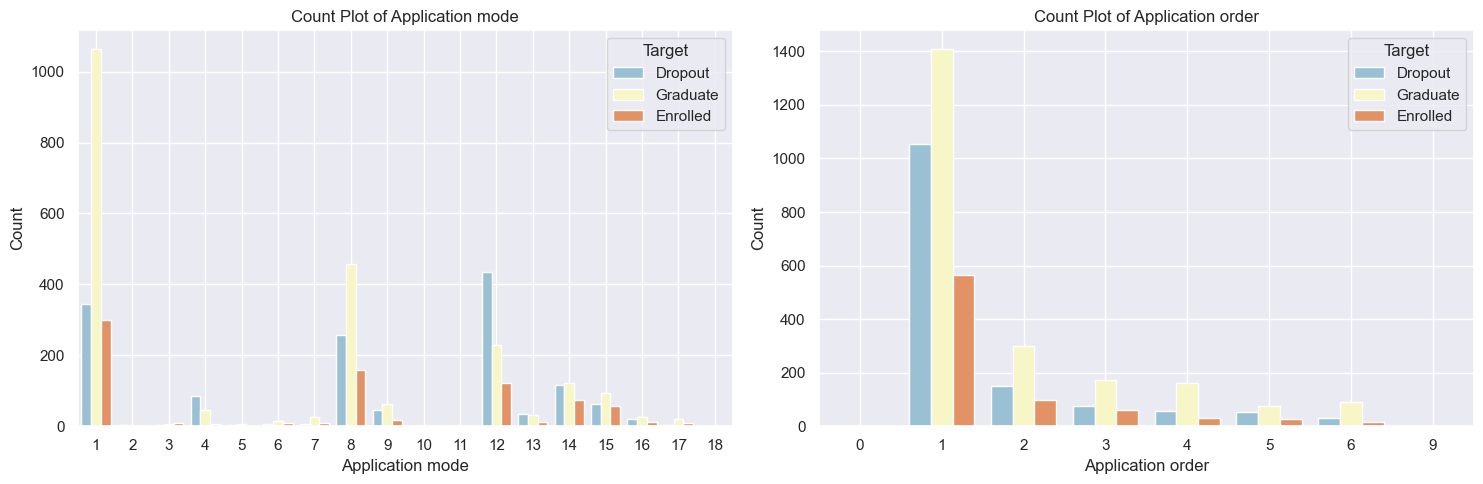

In [855]:
# Membuat canvas
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

app_cols = ['Application mode', 'Application order']

# Loop through app_cols
for i, column in enumerate(app_cols):
    # Specify the subplot axes
    ax = axes[i]

    # Show count plot
    sns.countplot(x=column, data=df, hue='Target', palette='RdYlBu_r', ax=ax)
    ax.set_title(f'Count Plot of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Count')
    ax.set_xticklabels(ax.get_xticklabels())
    ax.grid(True, color='white')  # Grid untuk memudahkan visualisasi

# Adjust layout and show plot
sns.set_style('darkgrid')
plt.tight_layout()
plt.show()

- 'Application mode': Mahasiswa yang mengikutin rekurtmen umum (index = 1) merupakan kategori mayoritas dari data ini. Sementara itu, ada hal unik dimana mahasiswa yang mulai memasuki institut saat berumur `lebih dari 23 tahun` (index = 12) akan memiliki kecenderungan untuk *drop-out*.

**Numerical**

In [61]:
# melihat bentuk penyebaran data
df_num.apply(lambda x: round(x.skew(), 3))

GDP                                      -0.394
Inflation rate                            0.252
Unemployment rate                         0.212
Curricular units 1st sem (credited)       4.169
Age at enrollment                         2.055
Curricular units 1st sem (enrolled)       1.619
Curricular units 1st sem (evaluations)    0.977
Curricular units 1st sem (approved)       0.766
Curricular units 1st sem (grade)         -1.568
Curricular units 2nd sem (credited)       4.635
Curricular units 2nd sem (enrolled)       0.788
Curricular units 2nd sem (evaluations)    0.336
Curricular units 2nd sem (approved)       0.306
Curricular units 2nd sem (grade)         -1.314
dtype: float64

Berdasarkan nilai skewness untuk kolom numerikal tersebut, diketahui bahwa:
- Kolom 'Inflation rate', 'Unemployment rate', 'Curricular units 1st sem (credited)', 'Age at enrollment', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', serta 'Curricular units 2nd sem (grade)' memiliki nilai skewness yang positif. 
- Kolom 'Inflation rate' dan 'Unemployment rate' memiliki nilai skewness positif namun mendekati nol. 
'Inflation rate', 'Unemployment rate'
- Kolom 'GDP' dan 'Curricular units 1st sem (grade)' memiliki nilai skewness negatif, atau yang berarti nilai rata-ratanya melebihi nilai tengah. 

Secara garis besar hampir seluruh kolom berbentuk skewed, namun sebenarnya mendekati normal (mendekati nol). Hal tersebut juga dapat terlihat pada visualisasi di bawah ini.

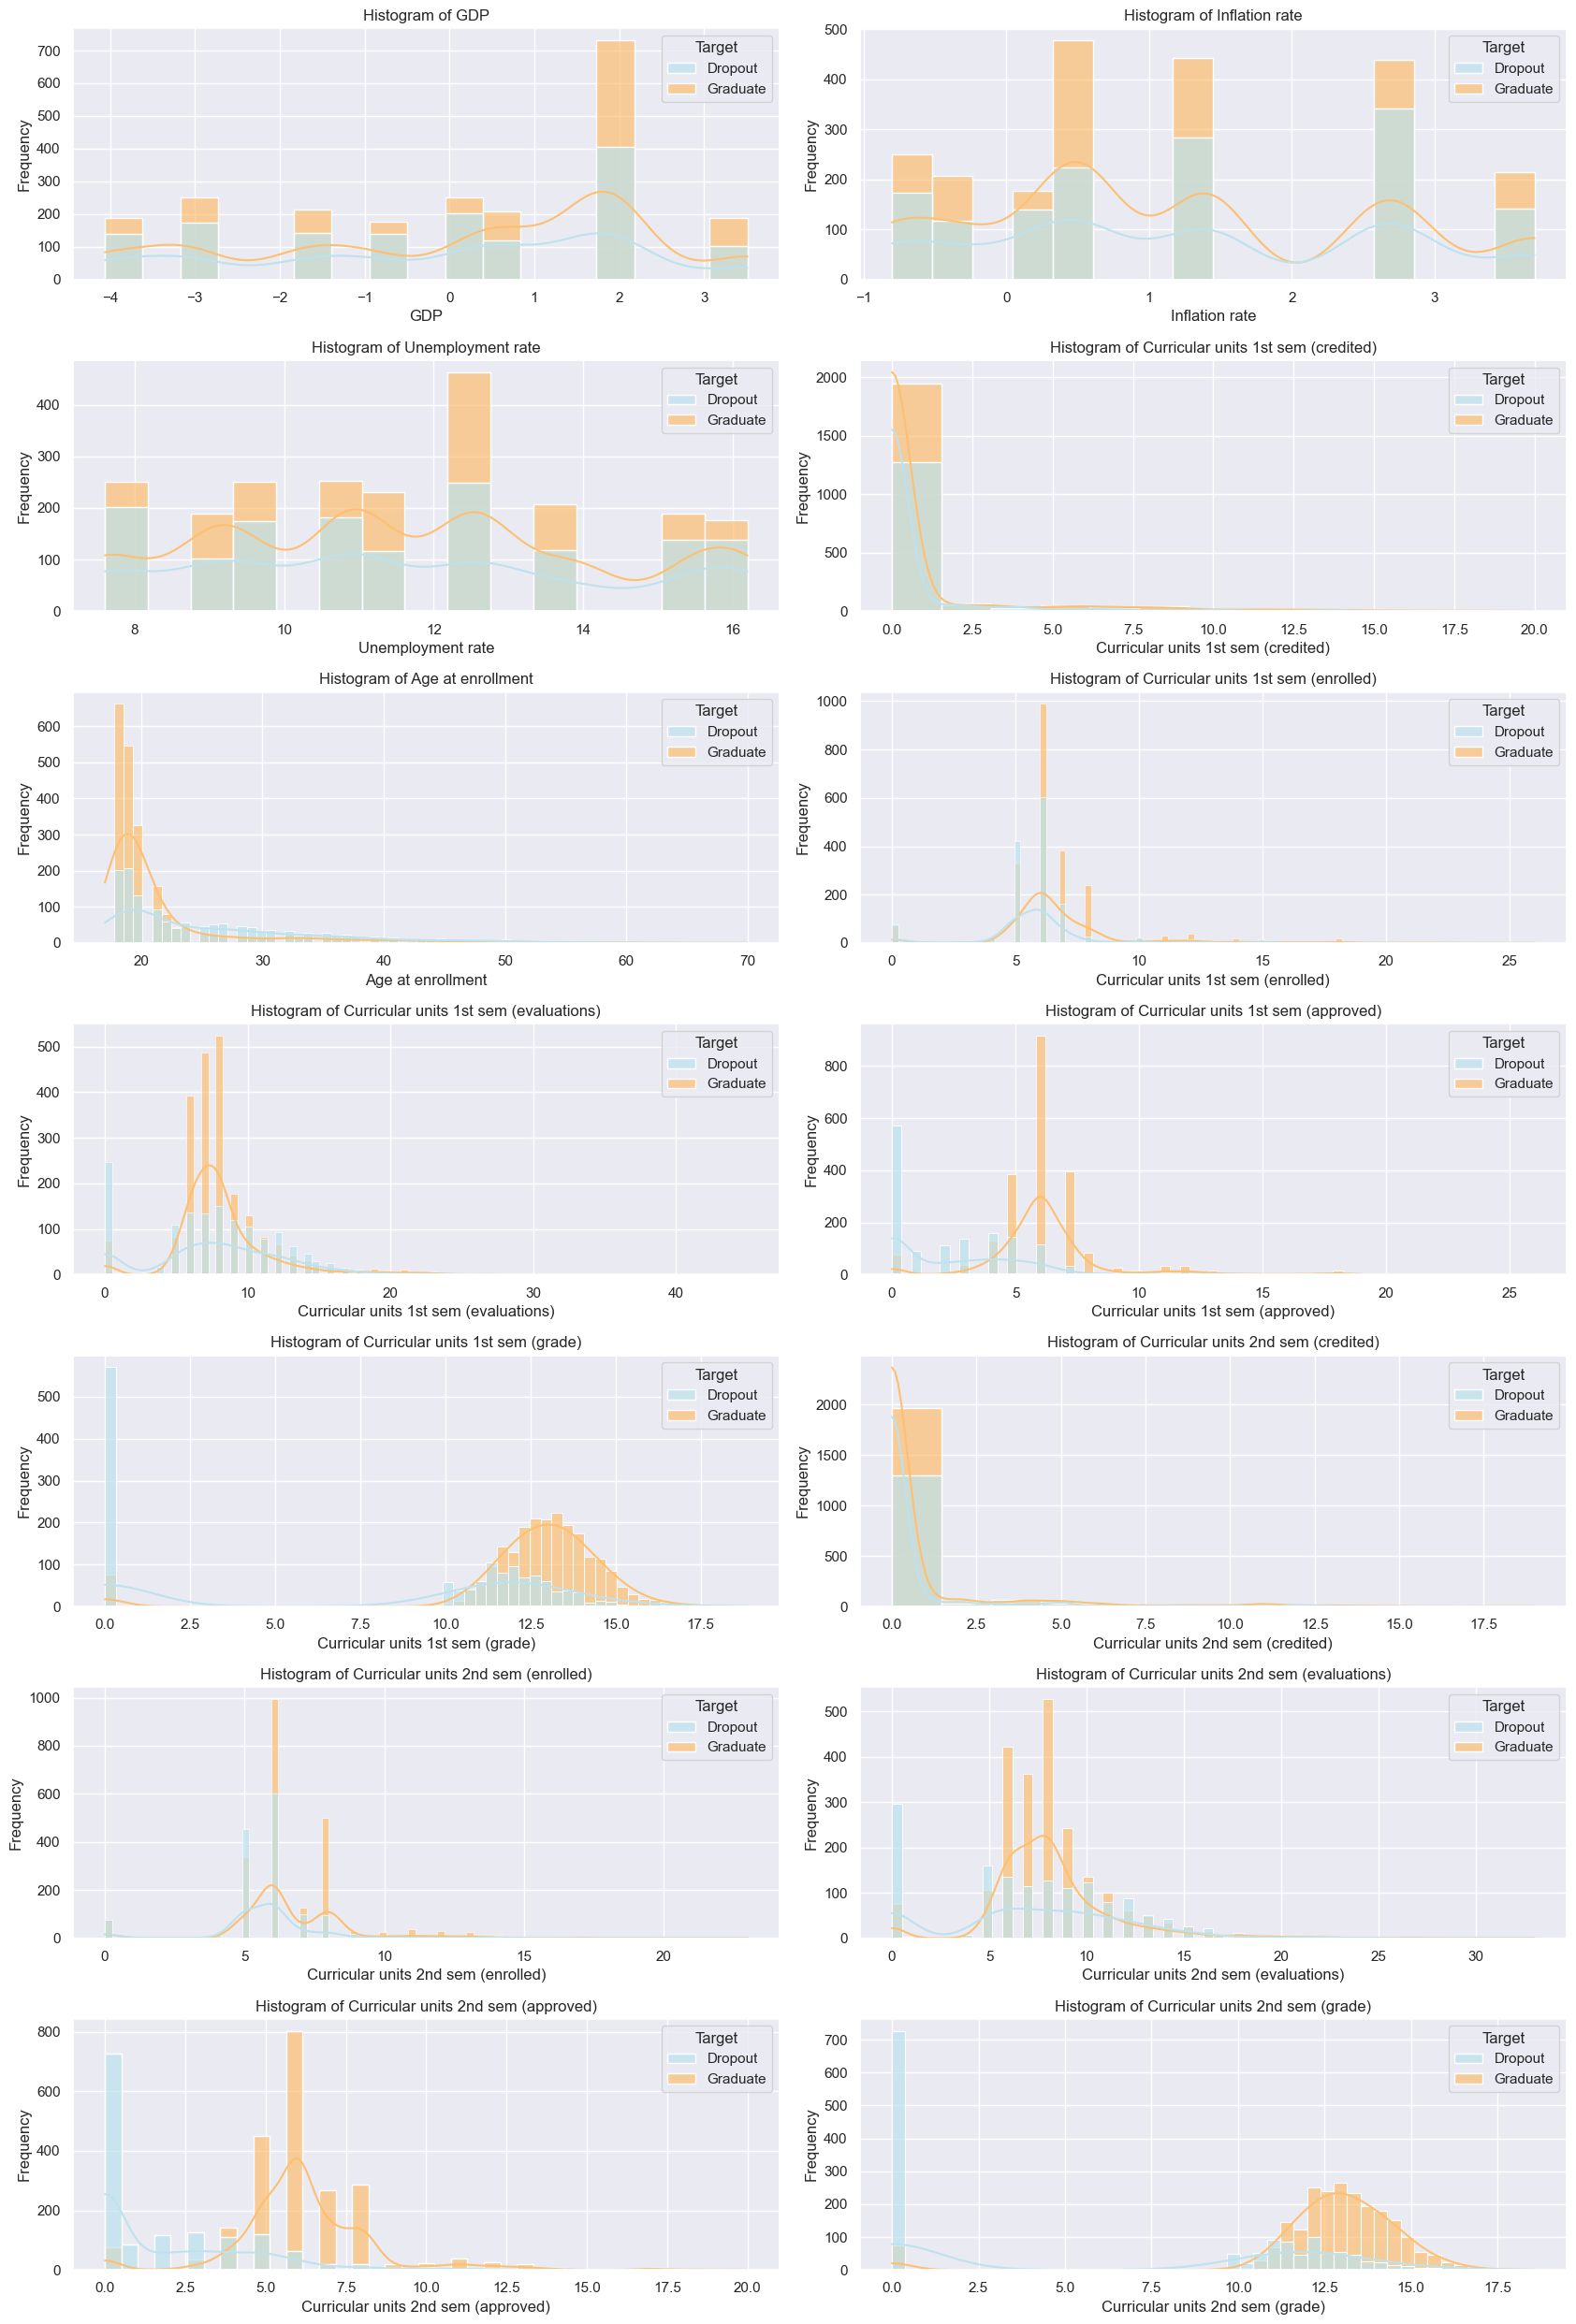

In [730]:
# Membuat canvas
fig, axes = plt.subplots(7, 2, figsize=(17, 25))

# Looping histogram
for i, ax in enumerate(axes.flatten()):
    if i < len(num_cols):
        # Membuat histogram dengan hue
        sns.histplot(data=df_drop_enroll, x=num_cols[i], palette='RdYlBu_r', hue='Target', alpha=0.7, ax=ax, kde=True)
        ax.set_title(f'Histogram of {num_cols[i]}')
        ax.set_xlabel(num_cols[i])
        ax.set_ylabel('Frequency')
        ax.grid(True, color='white')  # Grid untuk memudahkan visualisasi

# Show plot
sns.set_style('darkgrid')
plt.tight_layout()
plt.show()

Pada visualisasi tersebut, warna hijau menggambarkan kategori 'Graduated' dan 'Dropout' yang `bertumpuk`. Seterusnya, berdasarkan deskripsi beserta visualisasi, dapat diketahui bahwa:

- 'GDP': Kebanyakan mahasiswa memiliki pendapatan per kapita di daerahnya sekitar 2 trilliun dollar. Selain itu, terlihat bahwa rasio *drop-out* mahasiswa cukup tinggi pada GDP di angka -2,5.
- 'Inflation rate': Kebanyakan mahasiswa memiliki rate inflasi pada daerahnya di angka 1,5%. Ada kenaikan angka `drop-out` ketika rate inflasi mencapai angka `2,5%`.
- 'Unemployment rate': Kebanyakan mahasiswa memiliki tingkat pengangguran pada daerahnya sebanyak 12%. Namun untuk tingkatan *drop-out*, sepertinya tidak ada hubungan yang terlalu signifikan dengan tingkat pengangguran daerah. 
- 'Age at enrollment': Mayoritas mahasiswa berumur 18 tahun, dimana mahasiswa yang berumur `lebih dari 25` tahun memiliki kecenderungan untuk `drop-out`. 
- 'Curricular units 1st sem (credited)': Kebanyakan mahasiswa mendapatkan 1 kredit pada semester pertama. Karena data terlalu berkonsentrasi, sepertinya tidak ada relasi yang kuat dengan target (bisa juga karena diakibatkan hilangnya data, karena data mayoritas merupakan 0.0 hingga 1.0).
- 'Curricular units 1st sem (enrolled)': Kebanyakan mahasiswa mendaftar 6 SKS pada semester pertama. Sementara itu, mahasiswa yang mengambil SKS `kurang dari 5 memiliki tendensi utuk drop-out`. 
- 'Curricular units 1st sem (evaluations)': Kebanyakan mahasiswa mendapatkan evaluasi untuk 9 SKS pada semester pertama. Sementara itu, mahasiswa yang `drop-out tidak mendapatkan evaluasi SKS`. Terlihat juga bahwa jika terlalu banyak SKS diterima, maka ada kemungkinan bagi mahasiswa tersebut untuk gagal dan *drop-out*. 
- 'Curricular units 1st sem (approved)': Kebanyakan mahasiswa mendapatkan 6 SKS diterima pada semester pertama. Sementara itu, mahasiswa yang `drop-out tidak mendapatkan SKS` diterima.
- 'Curricular units 1st sem (grade)': Kebanyakan mahasiswa dengan grade tinggi (dari 13.0-17.5) pada semester pertama memiliki tendensi untuk lulus. Sementara itu, mahasiswa dengan grade lebih rendah bahkan hingga nol memiliki tendensi untuk *drop-out*. 
- 'Curricular units 2nd sem (credited)': Kebanyakan mahasiswa mendapatkan 1 kredit pada semester kedua.
- 'Curricular units 2nd sem (enrolled)': Kebanyakan mahasiswa mengambil 6 SKS pada semester kedua. Sementara itu, mahasiswa yang mengambil SKS `kurang dari 5` memiliki tendensi utuk *drop-out*.
- 'Curricular units 2nd sem (evaluations)': Kebanyakan mahasiswa mendapatkan evaluasi untuk 9 SKS pada semester kedua. Sementara itu, mahasiswa yang `drop-out tidak mendapatkan evaluasi SKS`. Terlihat juga bahwa jika terlalu banyak SKS diterima, maka ada kemungkinan bagi mahasiswa tersebut untuk gagal dan *drop-out*. 
- 'Curricular units 2nd sem (approved)': Kebanyakan mahasiswa mendapatkan 6 SKS diterima pada semester kedua. Sementara itu, mahasiswa yang `drop-out tidak mendapatkan SKS` atau mendapatkan sedikit SKS diterima.
- 'Curricular units 2nd sem (grade)': Sama seperti semester pertama, mahasiswa yang mendapatkan nilai lebih kecil cenderung memiliki tendensi untuk *drop-out*.

### Features Correlation

**Visualization**

<Axes: xlabel='Curricular units 1st sem (enrolled)', ylabel='Age at enrollment'>

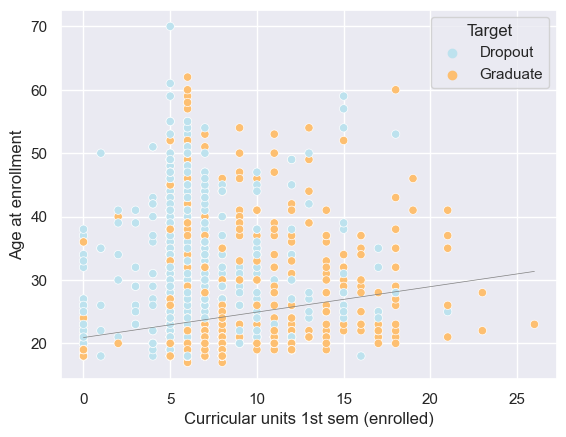

In [735]:
# scatter plot 
sns.scatterplot(x='Curricular units 1st sem (enrolled)', y='Age at enrollment', data=df_drop_enroll, hue='Target', palette='RdYlBu_r')
sns.regplot(x='Curricular units 1st sem (enrolled)', y='Age at enrollment', data=df_drop_enroll, scatter=False, color='grey', ci=None, line_kws={'linewidth': 0.5})

Terlihat bahwa mahasiswa yang memiliki status lulus cenderung memiliki umur yang relatif muda (18 hingga 30 tahun). Sementara itu, terlepas dari umurnya, terlihat banyak mahasiswa *drop-out* yang berkumpul pada jumlah Curricular Units diantara satu hingga tujuh sks. Hal ini menggambarkan bagaimana biasanya mahasiswa yang hanya mengambil kurang dari tujuh sks memiliki kecenderungan akan *drop-out*.


<Axes: xlabel='Curricular units 2nd sem (approved)', ylabel='Curricular units 2nd sem (grade)'>

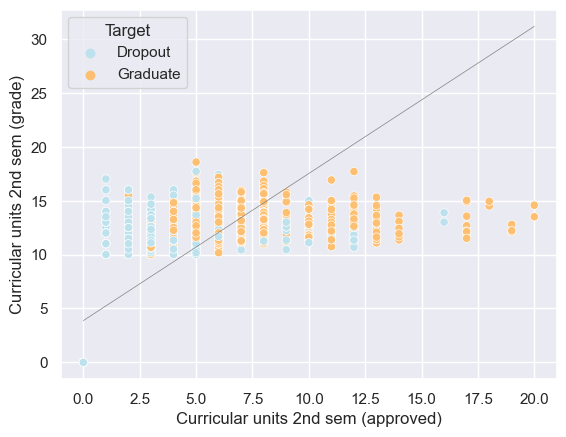

In [739]:
# scatter plot 
sns.scatterplot(x='Curricular units 2nd sem (approved)', y='Curricular units 2nd sem (grade)', data=df_drop_enroll, hue='Target', palette='RdYlBu_r')
sns.regplot(x='Curricular units 2nd sem (approved)', y='Curricular units 2nd sem (grade)', data=df_drop_enroll, scatter=False, color='grey', ci=None, line_kws={'linewidth': 0.5})

Mahasiswa yang memiliki jumlah SKS diterima kurang dari 2.5 memiliki kecenderungan untuk *drop-out*.

<Axes: xlabel='Curricular units 1st sem (grade)', ylabel='Age at enrollment'>

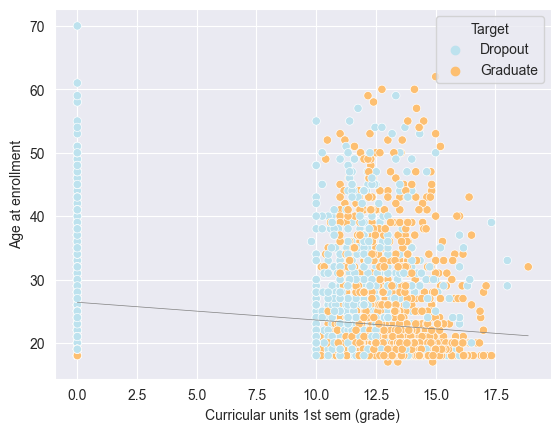

In [114]:
# scatter plot 
sns.scatterplot(x='Curricular units 1st sem (grade)', y='Age at enrollment', data=df_drop_enroll, hue='Target', palette='RdYlBu_r')
sns.regplot(x='Curricular units 1st sem (grade)', y='Age at enrollment', data=df_drop_enroll, scatter=False, color='grey', ci=None, line_kws={'linewidth': 0.5})

Mahasiswa yang lulus cenderung memiliki nilai yang lebih tinggi dibandingkan mahasiswa yang tidak lulus atau putus sekolah. Selain itu, ada *gap* diantara angka nilai 0.0 hingga 10.0, yang menandakan bahwa ada mahasiswa yang tidak lulus karena memang tidak pernah mengikuti pelajaran/ mendapatkan nilai 0, serta ada juga mahasiswa yang tidak lulus namun setidaknya `sempat berusaha` mengikuti kelas. Namun terlepas dari nilai, ada hal unik dimana beberapa pemilik nilai tertinggi juga tetap memiliki kemungkinan *dropout* (mungkin ada faktor lingkungan, sosio-ekonomi, dan sebagainya). 

<Axes: xlabel='Curricular units 1st sem (enrolled)', ylabel='Curricular units 2nd sem (enrolled)'>

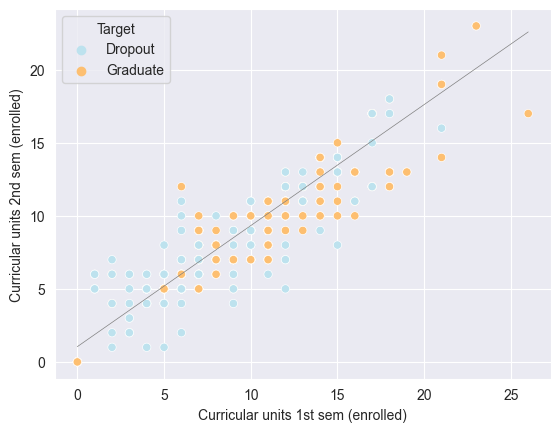

In [113]:
# scatter plot 
sns.scatterplot(x='Curricular units 1st sem (enrolled)', y='Curricular units 2nd sem (enrolled)', data=df_drop_enroll, hue='Target', palette='RdYlBu_r')
sns.regplot(x='Curricular units 1st sem (enrolled)', y='Curricular units 2nd sem (enrolled)', data=df_drop_enroll, scatter=False, color='grey', ci=None, line_kws={'linewidth': 0.5})

Terlihat ada hubungan linear antara *enrolled curricular* di semester satu dan dua. Pada plot ini, terlihat bahwa mahaswa yang lulus cenderung mengambil jumlah curricular yang sama pada semester satu dan dua. Sedangkan untuk murid yang tidak lulus, terlihat ada *inconsistency* dimana mereka cenderung mengambil jumlah curricular yang berbeda (entah karena ada yang mengulang, atau ada yang tidak dapat diambil karena IPK belum cukup, dan sebagainya)

<Axes: xlabel='GDP', ylabel='Curricular units 2nd sem (grade)'>

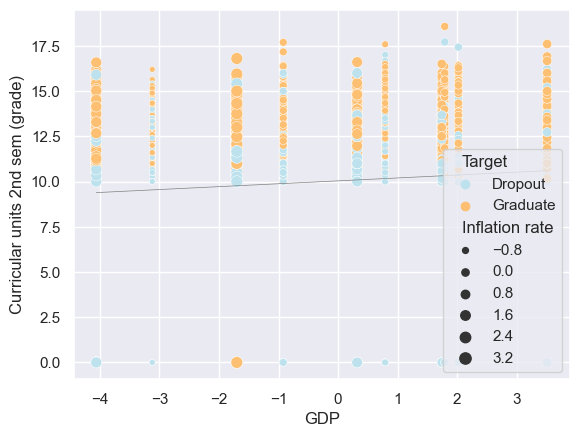

In [743]:
# scatter plot 
sns.scatterplot(x='GDP', y='Curricular units 2nd sem (grade)', size = 'Inflation rate', data=df_drop_enroll, hue='Target', palette='RdYlBu_r')
sns.regplot(x='GDP', y='Curricular units 2nd sem (grade)', data=df_drop_enroll, scatter=False, color='grey', ci=None, line_kws={'linewidth': 0.5})

Tidak ada korelasi yang signifikan dari pendapatan perkapita maupun kenaikan inflasi suatu daerah dengan kelulusan mahasiswa. Justru, jumlah SKS menjadi hal yang lebih penting dalam menentukan kelulusan mahasiswa.

**Grouping & Querying**

Karena telah diketahui bahwa beberapa kolom Curricular memiliki korelasi tinggi, maka untuk selanjutnya proses grouping akan memfokuskan untuk menggabukan kolom tersebut beserta fitur (terutama kategorikal) lainnya.

In [755]:
# melihat rata-rata SKS diterima berdasarkan target (socio economic)
df_drop_enroll.groupby(['Target','Displaced', 'Debtor'])[['Curricular units 2nd sem (approved)']].mean()

Curricular units 2nd sem (approved)
Target   Displaced Debtor                                     
Dropout  0         0                                  1.719023
                   1                                  1.960894
         1         0                                  2.128731
                   1                                  2.105263
Graduate 0         0                                  6.342233
                   1                                  6.524590
         1         0                                  6.066978
                   1                                  5.775000

Mahasiswa lulus yang bukan merupakan pengungsi dan bukan penghutang memiliki jumlah SKS diterima yang cenderung tinggi. Sementara itu, mahasiswa yang tidak memiliki hutang, tidak merupakan pengungsi, dan merupakan *drop-out* memiliki SKS paling rendah. Hal ini menunjukkan bahwa memang ada korelasi antara SKS dengan kelulusan mahasiswa, namun sepertinya untuk status mahasiswa sebagai pengungsi maupun status mahasiswa memiliki hutang `tidak berkorelasi dengan target.` 

In [760]:
# melihat rata-rata SKS diterima berdasarkan target (demographic)
df_drop_enroll.groupby(['Target', 'Gender'])[['Curricular units 2nd sem (approved)']].mean()

Curricular units 2nd sem (approved)
Target   Gender                                     
Dropout  0                                  2.222222
         1                                  1.650499
Graduate 0                                  6.284166
         1                                  5.852190

Mahasiswa pria memiliki jumlah SKS diterima yang lebih sedikit daripada wanita, serta memiliki kecenderungan  untuk *drop-out*. Namun terlepas dari jenis kelaminnya, mahasiswa yang memiliki jumlah SKS diterima yang rendah memiliki tendensi untuk dropout. 

In [754]:
# melihat rata-rata SKS diterima berdasarkan target (student status)
df_drop_enroll.groupby(['Target','International', 'Scholarship holder', 'Tuition fees up to date'])[['Curricular units 2nd sem (approved)']].mean()

Curricular units 2nd sem (approved)
Target   International Scholarship holder Tuition fees up to date                                     
Dropout  0             0                  0                                                   1.589372
                                          1                                                   2.040284
                       1                  0                                                   1.964286
                                          1                                                   2.660194
         1             0                  0                                                   1.800000
                                          1                                                   1.071429
                       1                  1                                                   2.000000
Graduate 0             0                  0                                                   5.928571
                                          1                                                   6.196821
                       1                  0                                                   5.750000
                                          1                                                   6.167488
         1             0                  0                                                   6.000000
                                          1                                                   6.212121
                       1                  0                                                   5.000000
                                          1                                                   5.428571

Mahasiswa yang membayar tuition cenderung memiliki SKS lebih tinggi dan cenderung untuk lulus. Selain itu, mahasiswa yang mendapatkan beasiswa ternyata `tidak memiliki rata-rata` SKS diterima yang lebih tinggi dibandingkan mahasiswa yang tidak mendapatkan beasiswa. Namun memang, jika dilihat secara keseluruhan, mahasiswa dengan beasiswa cenderung menyelesaikan studinya. 

### Outlier

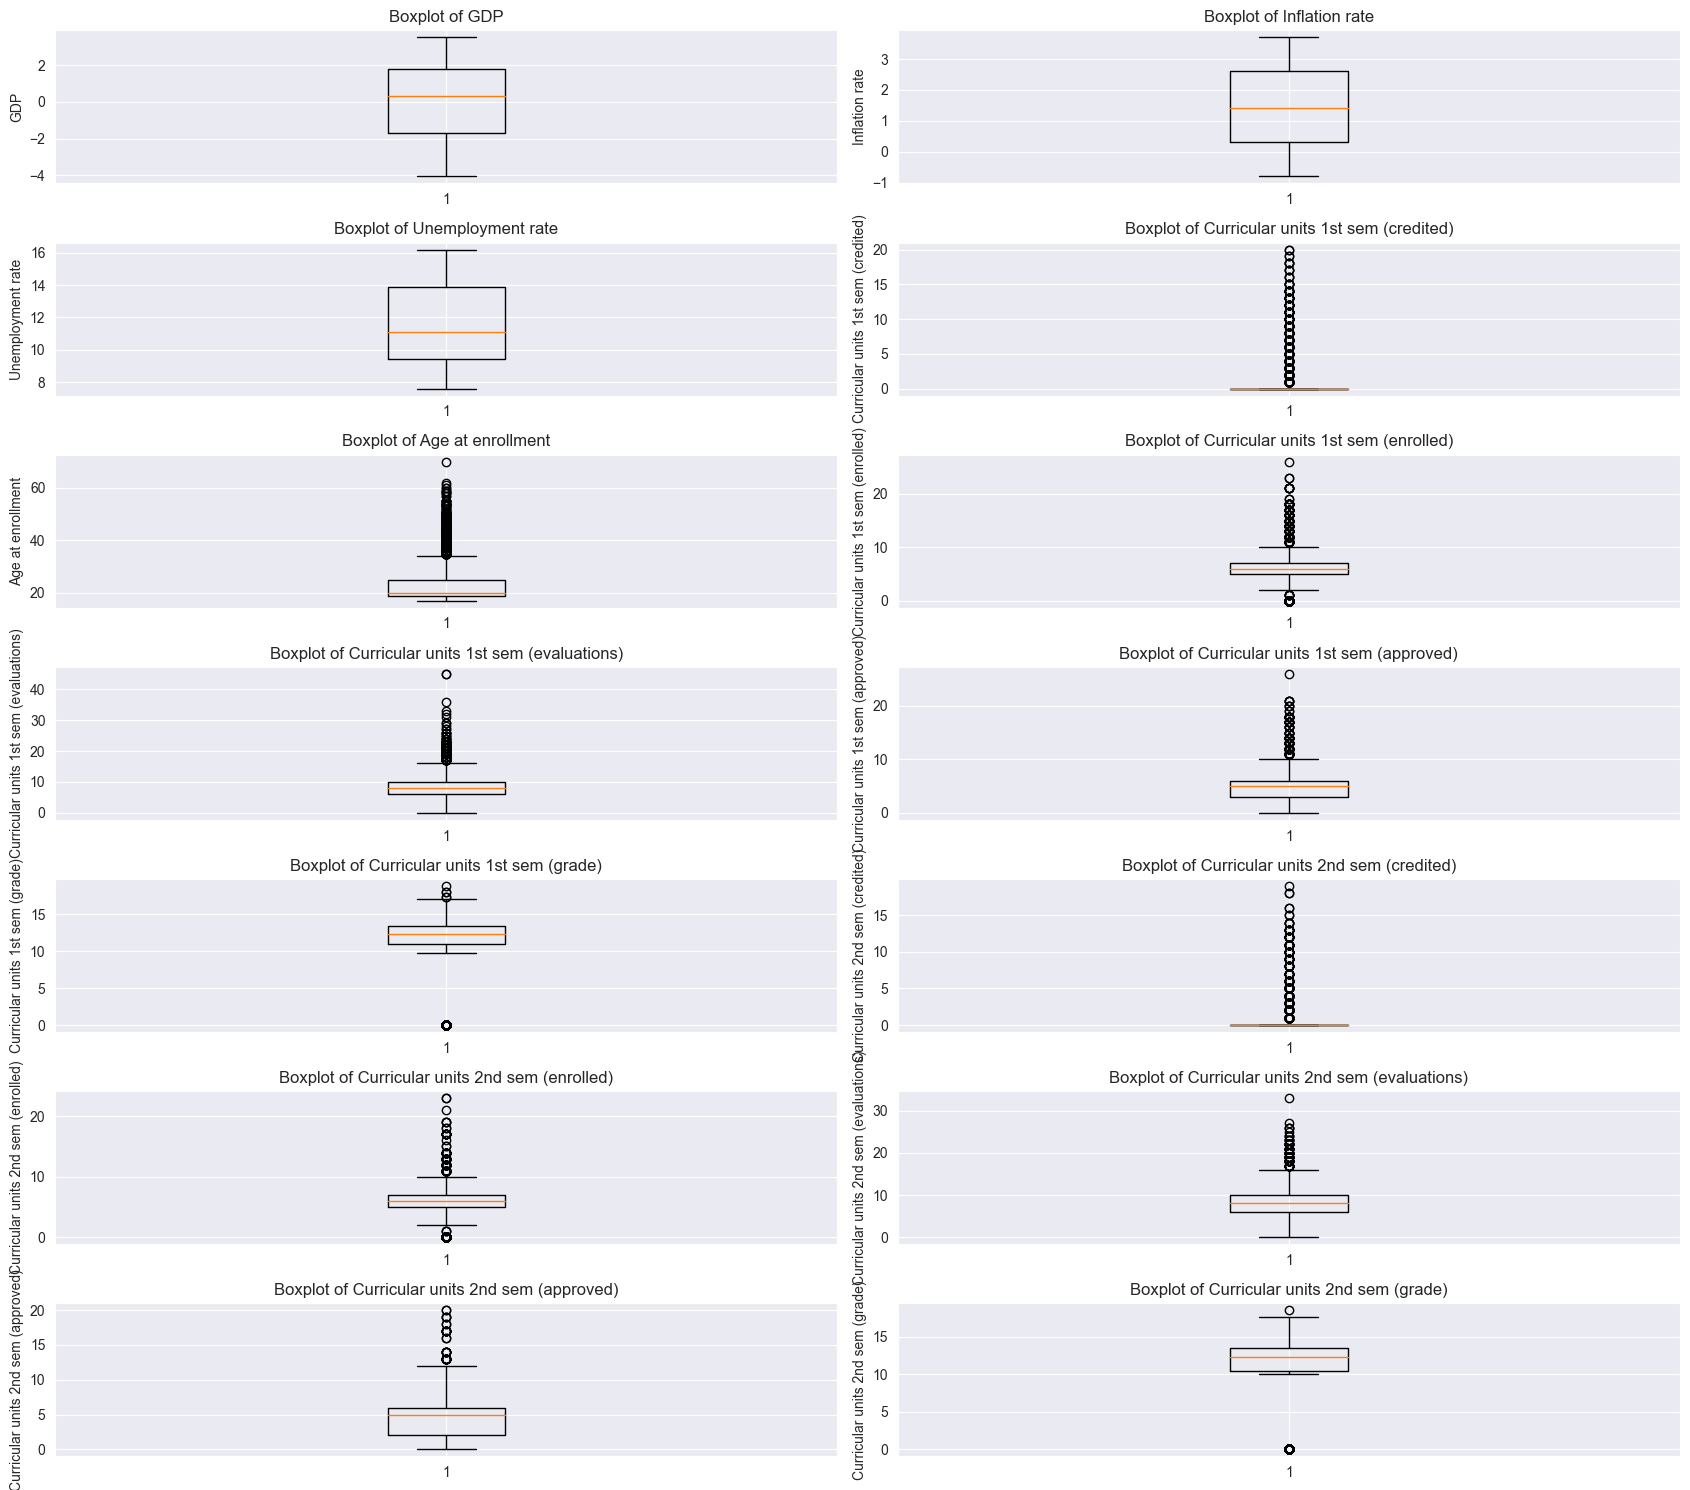

In [66]:
# membuat canvas
fig, axes = plt.subplots(7, 2, figsize=(17, 15))

# membuat box plot untuk melihat outlier pada data numerikal
for i, col in enumerate(num_cols):
    ax = axes[i // 2, i % 2]
    ax.boxplot(df_drop_enroll[col])
    ax.set_title(f'Boxplot of {col}')
    ax.set_ylabel(col)

plt.tight_layout()
plt.show()

Ditemukan adanya outlier di hampir seluruh kolom numerikal. Pada bagian modelling akan ditelusuri lebih lanjut mengenai teknik handling yang paling cocok untuk kolom-kolom ini.

### Conclusion

Dari hasil eksplorasi data, kita telah mengetahui bahwa beberapa fitur memiliki hubungan linear terhadap target. Kami juga telah mengetahui bahwa data target merupakan data kategorikal yang (kini) terdiri atas dua kategori atau `biner`. Ukuran data termasuk sedang karena memiliki kurang lebih 4000 baris. Dari hasil eksplorasi ini sebenarnya kami sudah dapat memiliki gambaran model mana yang cocok dengan ciri tersebut (linear, biner, dan sebagainya), namun pada proyek kali ini kami akan mencoba lima jenis model klasifikasi untuk membuktikan asumsi tersebut. 

# V. Feature Engineering

### Split Train Test

In [115]:
# split Fitur dan target
X= df_drop_enroll.drop('Target', axis=1)
y= df_drop_enroll['Target']

In [116]:
# Membagi data test dan train
from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test= train_test_split(X,y, test_size=0.3, # 0,3 karena data sedang (3000 baris) 
                                                  random_state=66, stratify = y)
print(f'train size: {X_train.shape}')
print(f'test size: {X_test.shape}')

train size: (2541, 30)
test size: (1089, 30)


In [117]:
# reset index
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

Selanjutnya juga akan dilakukan split kolom kategorikal dan numerikal. 

In [171]:
# split test dan train untuk berdasarkan masing-masing pembagian data numerikal dan kategorikal

X_train_num = X_train[num_cols]
X_test_num = X_test[num_cols]

X_train_cat = X_train[cat_cols_feature]
X_test_cat = X_test[cat_cols_feature]

X_train_num.head(2)

,GDP,Inflation rate,Unemployment rate,Curricular units 1st sem (credited),Age at enrollment,Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade)
0,3.51,1.4,8.9,0,21,6,7,6,10.571429,0,6,8,5,11.0
1,-0.92,0.3,16.2,0,20,6,16,4,11.800000,0,6,15,2,12.0


### Encode Target

In [144]:
# encode target ke ordinal saja karena binary
enc_oe = OrdinalEncoder()

# convert dataframe agar dapat di encode
y_train_df = pd.DataFrame(y_train, columns=['Target'])
y_test_df = pd.DataFrame(y_test, columns=['Target'])
y_cols = ['Target']

# fit encoder
y_train_enc = enc_oe.fit_transform(y_train_df[y_cols]) # result array
y_test_enc = enc_oe.transform(y_test_df[y_cols]) # result array

# convert dataframe bila perlu
y_train_enc_df = pd.DataFrame(y_train_enc, columns=[ 'Target'])
y_test_enc_df = pd.DataFrame(y_test_enc, columns=['Target'])
y_train_enc_df.head(2)


,Target
0,1.0
1,0.0


Target sudah diterapkan encode dengan `index 0 = 'Dropout'`, `1 = 'Graduate'`. Yang akan menjadi fokusan nantinya adalah index 0.

### Feature Selection

Akan dilakukan beberapa teknik untuk pemilihan fitur. Karena data asli sudah ditransformasikan ke dalam bentuk angka, maka dapat dilakukan uji korelasi Pearson. Kami juga akan melakukan pemilihan fitur dengan Chi-square dan ANOVA.

**ANOVA**

In [181]:
# melakukan pemilihan ANOVA untuk data kategorikal
selector = SelectKBest(score_func=f_classif, k=4) 

selector.fit(X_train_cat, y_train_df)
df_scores = pd.DataFrame({'Cat Feature': X_train_cat.columns, 
                          'Score': selector.scores_,
                          'p-value': (selector.pvalues_).round(4)})

# mengurutkan data
df_scores = df_scores.sort_values(by=['Score'], ascending=False)
df_scores

,Cat Feature,Score,p-value
12,Tuition fees up to date,616.333424,0.0000
14,Scholarship holder,273.034562,0.0000
13,Gender,176.549506,0.0000
11,Debtor,165.367100,0.0000
9,Displaced,44.738448,0.0000
3,Previous qualification,26.338427,0.0000
0,Marital status,22.224482,0.0000
8,Father's occupation,17.888387,0.0000
7,Mother's occupation,16.847311,0.0000
2,Daytime/evening attendance,15.862254,0.0001


Tabel di atas menunjukkan bahwa seluruh kolom numerikal memiliki hubungan dengan target. Hal tersebut terlihat dari p-value yang kurang dari 0.05. Sementara itu, score yang besar akan menandakan keterhubungan yang lebih besar juga; ditandai dengan kolom 'Tuition fees up to date' yang memiliki value score tertinggi. 

**Chi-Square**

In [ ]:
# melakukan chi-square terhadap target
chi_scores = []
for column in cat_cols_feature:
    contingency_table = pd.crosstab(X_train[column], y_train_enc_df['Target'])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    chi_scores.append((column, p))

# sort berdasarkan p-value
chi_scores.sort(key=lambda x: x[1]) #<0.05 berkorelasi

# print
for chi in chi_scores:
    print(f"Feature: {chi[0]}, p-value: {chi[1]}")

Feature: Tuition fees up to date, p-value: 2.2784890148338517e-109
Feature: Course, p-value: 4.663957643121663e-59
Feature: Scholarship holder, p-value: 2.7850208440043887e-55
Feature: Gender, p-value: 1.4377918506472435e-37
Feature: Debtor, p-value: 2.582521212575478e-35
Feature: Previous qualification, p-value: 1.4632899079410462e-15
Feature: Father's qualification, p-value: 8.616240419100805e-12
Feature: Displaced, p-value: 4.3346446465665844e-11
Feature: Mother's occupation, p-value: 7.501123773280476e-11
Feature: Mother's qualification, p-value: 1.4877583748463354e-10
Feature: Father's occupation, p-value: 1.9114601101360533e-08
Feature: Marital status, p-value: 3.701808374058788e-07
Feature: Daytime/evening attendance, p-value: 9.328360559123327e-05
Feature: Nacionality, p-value: 0.4529913443487453
Feature: International, p-value: 0.7764855301445026
Feature: Educational special needs, p-value: 0.8975000554909641


Diketahui bahwa menurut uji Chi-square, 'Educational special needs', 'International', dan 'Nacionality', tidak begitu berkorelasi dengan target. Sementara itu, 'Tuituion fees' serta 'Course' memiliki nilai yang sangat rendah yang menandakan bahwa ada ketergantungan yang signifikan antara fitur dengan target. 

**VIF**

In [ ]:
# membuat fungsi VIF
def calc_vif(X):
    '''
    insert value = dataframe
    hasil tinggi memiliki multicollinearity tinggi
    '''
    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif.sort_values(by=['VIF'],ascending=True)
    return(vif)
# kalkulasi vif
calc_vif(X_train)   

,variables,VIF
10,Educational special needs,1.020037
29,GDP,1.213823
11,Debtor,1.454366
14,Scholarship holder,1.648768
3,Previous qualification,1.659047
13,Gender,1.732769
28,Inflation rate,1.889481
9,Displaced,2.567154
5,Mother's qualification,4.677001
6,Father's qualification,4.760535


Bila dilihat menggunakan VIF, fitur 'Mother's occupation' kebawah memiliki VIF lebih dari 10. Hal ini dapat menandakan adanya *multicollinearity*--yaitu sejauh mana variabel independen dalam model linear berkorelasi satu sama lain.

**Random Forest's Feature Importances**

Melihat important features berdasarkan pemilihan model Random Forest karena salah satu model yang akan dibuat adalah Random Forest.

In [188]:
# definisi model
rf_class = RandomForestClassifier(n_estimators=100)
rf_class.fit(X_train, y_train)

# sort berdasarkan kepentingan
importances = rf_class.feature_importances_
sorted_rf = np.argsort(rf_class.feature_importances_)[::-1]

# Print the feature importances
for i in sorted_rf:
    print(f'Feature: {X_train.columns[i]}, Importance: {importances[i]}')

Feature: Curricular units 2nd sem (approved), Importance: 0.21581497482399917
Feature: Curricular units 1st sem (approved), Importance: 0.14390260836344834
Feature: Curricular units 2nd sem (grade), Importance: 0.11838488172749881
Feature: Curricular units 1st sem (grade), Importance: 0.08109220217838319
Feature: Tuition fees up to date, Importance: 0.05634986729304533
Feature: Age at enrollment, Importance: 0.03741185992743672
Feature: Curricular units 1st sem (evaluations), Importance: 0.03481589534104714
Feature: Curricular units 2nd sem (evaluations), Importance: 0.03165084397831377
Feature: Course, Importance: 0.028789162910944834
Feature: Curricular units 2nd sem (enrolled), Importance: 0.024000326874253984
Feature: Father's occupation, Importance: 0.021689791958211566
Feature: Mother's occupation, Importance: 0.020673295937625458
Feature: Curricular units 1st sem (enrolled), Importance: 0.0182332796124096
Feature: GDP, Importance: 0.01787342281405191
Feature: Unemployment rate, 

Jika melihat dari importance yang telah diurutkan oleh model Random Forest, fitur yang memiliki persentase di atas 5% adalah 'Tuition fees up to date','Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)', 'Curricular units 1st sem (approved)', 'Curricular units 2nd sem (approved)'.

**Final Feature**


Karena sebelumnya telah dilakukan *early feature selection* (pada bagian EDA) difilter dan karena kami sedang melakukan uji coba untuk beberapa model, maka kami akan tidak ingin mereferensikan salah satu selektor yang dapat memungkinkan timbulnya bias. Oleh karena itu, hingga tahap ini, seluruh fitur akan dipertahankan untuk dilanjutkan ke dalam pembuatan model.

# VI. Model Training

Akan dilakukan percobaan dengan lima model. Model tersebut serta deskripsi singkatnya adalah:

1. **Support Vector Classifier (SVC)**: Varian SVM yang dapat menangani masalah klasifikasi biner dan multiclass. Menggunakan support vector untuk membuat *decision boundary*.

2. **Decision Tree**: Model non-parametrik yang membagi fitur berdasarkan keputusan. 

3. **Random Forest**: Model ensemble yang terdiri dari Decision Tree.

4. **CatBoost**: Berasal dari model basis Decision Tree yang diterapkan gradient boosting. Cocok untuk data kategorikal.

5. **AdaBoost**: Model ensemble yang menggabungkan model lemah untuk meningkatkan kinerja secara keseluruhan.

### Pre-Process

In [415]:
# kolom biner 
ohe_cols = ["Daytime/evening attendance", "Displaced", "Educational special needs","Debtor", "Tuition fees up to date", "Gender", "Scholarship holder","International"]

# kolom nominal one hot
nom_cols = ["Marital status", "Course", "Nacionality","Mother's occupation", "Father's occupation"]

# kolom ordinal ranking
oe_cols = ["Previous qualification", "Mother's qualification", "Father's qualification"]

In [ ]:
# membuat variabel baru agar scaling tidak mengenai kolom kategorikal
column_transformer = ColumnTransformer([
    ('standard', StandardScaler(), num_cols)])

**Define default model**

Pada bagian ini akan digunakan pipeline untuk menggabungkan berbagai proses transformasi sebelum modelling. Berikut adalah sedikit penjelasan dalam penggunaan tiap transformer:
- Standard scaler: Scaling untuk kolom numerikal saja agar tidak mengenai kolom kategorikal yang sudah menjadi angka. Pemilihan jenis scaler standar karena asumsinya yang tahan outlier serta karena data yang dimiliki dianggap mendekati normal. Selain itu juga akan digunakan transformasi yeo-johnson dengan asumsi akan membuat data lebih normal. 
- Yeo-johnson: Ekstensi dari Box-Cox yang menerapkan suatu rumus (logaritma dan sebagainya) untuk membuat persebaran data lebih normal
- Gaussian method: Teknik handling outlier karena data diasumsikan akan mendekati normal
- SMOTE: Melakukan oversampling pada data karena sebelumnya didapati bahwa data 'Dropout' (index = 0) berjumlah hanya sekitar setengah dari data 'Graduated'.

In [789]:

# default masing-masing model
def_svc = Pipeline([('coltransformer', column_transformer),
                    ('transformer', PowerTransformer(method='yeo-johnson')), # agar data lebih normal  
                    ('wins', Winsorizer(capping_method='gaussian', fold=3, tail='both')),
                    ('sampling', SMOTE(random_state=66)),  # smote oversampling
                    ('classifier', SVC(random_state=66))])


def_dt = Pipeline([('coltransformer', column_transformer),
                    ('transformer', PowerTransformer(method='yeo-johnson')), # agar data lebih normal  
                    ('wins', Winsorizer(capping_method='gaussian', fold=3, tail='both')),
                    ('sampling', SMOTE(random_state=66)),  # smote oversampling
                    ('classifier', DecisionTreeClassifier(random_state=66))])


def_rf = Pipeline([('coltransformer', column_transformer),
                    ('transformer', PowerTransformer(method='yeo-johnson')), # agar data lebih normal  
                    ('wins', Winsorizer(capping_method='gaussian', fold=3, tail='both')),
                    ('sampling', SMOTE(random_state=66)),  # smote oversampling
                    ('classifier', RandomForestClassifier(random_state=66))])

def_cb = Pipeline([('coltransformer', column_transformer),
                    ('transformer', PowerTransformer(method='yeo-johnson')), # agar data lebih normal  
                    ('wins', Winsorizer(capping_method='gaussian', fold=3, tail='both')),
                    ('sampling', SMOTE(random_state=66)),  # smote oversampling
                    ('classifier', CatBoostClassifier(random_state=66,verbose=False))]) # supaya tidak print learning rate

def_ab = Pipeline([('coltransformer', column_transformer),
                    ('transformer', PowerTransformer(method='yeo-johnson')), # agar data lebih normal  
                    ('wins', Winsorizer(capping_method='gaussian', fold=3, tail='both')),
                    ('sampling', SMOTE(random_state=66)),  # smote oversampling
                    ('classifier', AdaBoostClassifier(random_state=66))])                    

**Extract oversampled data**

Perlu dilakukan ekstraksi sample yang telah diseimbangkan dari transformasi SMOTE yang dilakukan menggunakan Pipeline.

<Axes: xlabel='Target', ylabel='count'>

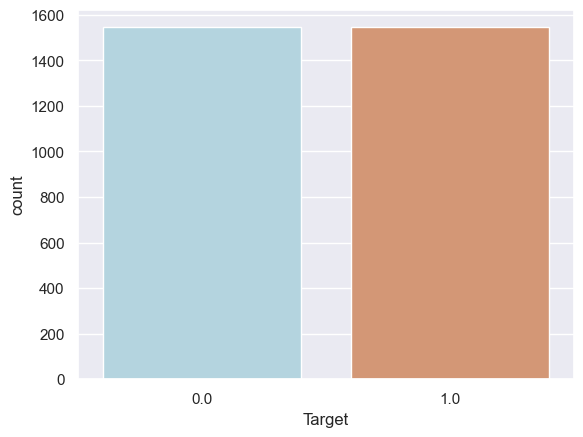

In [783]:
# mengambil sample yang telah balance dari pipeline
X_train_resampled, y_train_resampled = def_svc['sampling'].fit_resample(X_train, y_train)
X_train_resampled, y_train_resampled_enc = def_svc['sampling'].fit_resample(X_train, y_train_enc) # yang sudah di encode

#Membuat dataframe baru berdasarkan data yang telah diseimbangkan
resampled_y = pd.DataFrame({'Target': y_train_resampled})
resampled_y_enc = pd.DataFrame({'Target': y_train_resampled_enc})

# visualisasi untuk memastikan data sudah balance
sns.set(style="darkgrid", palette=custom_palette)
sns.countplot(data=resampled_y_enc, x='Target')

In [390]:
print('Before sampling:', y_train_df.value_counts(), '\n')
print('After sampling:', resampled_y_enc.value_counts())

Before sampling: Target  
Graduate    1546
Dropout      995
dtype: int64 

After sampling: Target
0.0       1546
1.0       1546
dtype: int64


Hasil resampling sudah terekstraksi dan akan digunakan untuk proses modelling selanjutnya. 

### SVM-C

In [796]:
# define model
def_svc.fit(X_train_resampled, y_train_resampled_enc)

Pipeline(steps=[('coltransformer',
                 ColumnTransformer(transformers=[('standard', StandardScaler(),
                                                  ['GDP', 'Inflation rate',
                                                   'Unemployment rate',
                                                   'Curricular units 1st sem '
                                                   '(credited)',
                                                   'Age at enrollment',
                                                   'Curricular units 1st sem '
                                                   '(enrolled)',
                                                   'Curricular units 1st sem '
                                                   '(evaluations)',
                                                   'Curricular units 1st sem '
                                                   '(approved)',
                                                   'Curricular units 1st sem '
                                                   '(grade)',
                                                   'Curricular units 2nd sem '
                                                   '(credited)',
                                                   'Curricular units 2nd sem '
                                                   '(enrolled)',
                                                   'Curricular units 2nd sem '
                                                   '(evaluations)',
                                                   'Curricular units 2nd sem '
                                                   '(approved)',
                                                   'Curricular units 2nd sem '
                                                   '(grade)',
                                                   'Target', 'Target'])])),
                ('transformer', PowerTransformer()),
                ('wins', Winsorizer(tail='both')),
                ('sampling', SMOTE(random_state=66)),
                ('classifier', SVC(random_state=66))])

In [482]:
# prediksi
y_svc_train_pred = def_svc.predict(X_train_resampled)
y_svc_test_pred = def_svc.predict(X_test)

**Report**

In [780]:
print('------------------Report Train Set------------------')
print(classification_report(y_train_resampled_enc, y_svc_train_pred))
print('\n ------------------Report Test Set------------------')
print(classification_report(y_test_enc, y_svc_test_pred))

------------------Report Train Set------------------
              precision    recall  f1-score   support

         0.0       0.92      0.86      0.89      1546
         1.0       0.87      0.93      0.90      1546

    accuracy                           0.89      3092
   macro avg       0.90      0.89      0.89      3092
weighted avg       0.90      0.89      0.89      3092


 ------------------Report Test Set------------------
              precision    recall  f1-score   support

         0.0       0.91      0.84      0.87       426
         1.0       0.90      0.95      0.92       663

    accuracy                           0.90      1089
   macro avg       0.90      0.89      0.90      1089
weighted avg       0.90      0.90      0.90      1089



In [762]:
# melihat skor akurasi
print('Training Score: ',round(def_svc.score(X_train_resampled, y_train_resampled_enc),4))
print('Testing Score: ', round(def_svc.score(X_test, y_test_enc),4))

Training Score:  0.8949
Testing Score:  0.9027


In [798]:
# Membuat variabel untuk cross validatioin
f1_cv_svc = cross_val_score(def_svc, # model
                            X_train_resampled, y_train_resampled_enc, cv=3,
                            scoring='f1')

print('F1 Score - All - Cross Validation  : ', f1_cv_svc)
print('F1 Score - Mean - Cross Validation : ', f1_cv_svc.mean())
print('F1 Score - Std - Cross Validation  : ', f1_cv_svc.std())
print('F1 Score - Range                   : ', (f1_cv_svc.mean()-f1_cv_svc.std()) , '-', (f1_cv_svc.mean()+f1_cv_svc.std()))

F1 Score - All - Cross Validation  :  [0.8988764  0.90322581 0.90145396 0.89731438 0.90423862]
F1 Score - Mean - Cross Validation :  0.9010218326908918
F1 Score - Std - Cross Validation  :  0.002597692863719017
F1 Score - Range                   :  0.8984241398271727 - 0.9036195255546108


Model SVM memiliki tendensi good-fit hingga cenderung underfit jika membandingkan train dan test set. Model dapat memprediksi index 0 dengan cukup baik (f1-score 0.87) dan lebih baik lagi dalam memprediksi index 1 (f1-score 0.92)

### Decision Tree

In [492]:
# define model
def_dt.fit(X_train_resampled, y_train_resampled_enc)

Pipeline(steps=[('coltransformer',
                 ColumnTransformer(transformers=[('standard', StandardScaler(),
                                                  ['GDP', 'Inflation rate',
                                                   'Unemployment rate',
                                                   'Curricular units 1st sem '
                                                   '(credited)',
                                                   'Age at enrollment',
                                                   'Curricular units 1st sem '
                                                   '(enrolled)',
                                                   'Curricular units 1st sem '
                                                   '(evaluations)',
                                                   'Curricular units 1st sem '
                                                   '(approved)',
                                                   'Curricular units 1st sem '
                                                   '(grade)',
                                                   'Curricular units 2nd sem '
                                                   '(credited)',
                                                   'Curricular units 2nd sem '
                                                   '(enrolled)',
                                                   'Curricular units 2nd sem '
                                                   '(evaluations)',
                                                   'Curricular units 2nd sem '
                                                   '(approved)',
                                                   'Curricular units 2nd sem '
                                                   '(grade)'])])),
                ('transformer', PowerTransformer()),
                ('wins', Winsorizer(tail='both')),
                ('sampling', SMOTE(random_state=66)),
                ('classifier', DecisionTreeClassifier(random_state=66))])

In [493]:
# prediksi
y_dt_train_pred = def_dt.predict(X_train_resampled)
y_dt_test_pred = def_dt.predict(X_test)

**Report**

In [496]:
print('------------------Report Train Set------------------')
print(classification_report(y_train_resampled_enc, y_dt_train_pred))
print('\n ------------------Report Test Set------------------')
print(classification_report(y_test_enc, y_dt_test_pred))

------------------Report Train Set------------------
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      1546
         1.0       1.00      0.98      0.99      1546

    accuracy                           0.99      3092
   macro avg       0.99      0.99      0.99      3092
weighted avg       0.99      0.99      0.99      3092


 ------------------Report Test Set------------------
              precision    recall  f1-score   support

         0.0       0.74      0.81      0.78       426
         1.0       0.87      0.82      0.85       663

    accuracy                           0.82      1089
   macro avg       0.81      0.82      0.81      1089
weighted avg       0.82      0.82      0.82      1089



In [497]:
# melihat skor akurasi
print('Training Score: ',round(def_dt.score(X_train_resampled, y_train_resampled_enc),4))
print('Testing Score: ', round(def_dt.score(X_test, y_test_enc),4))

Training Score:  0.9903
Testing Score:  0.8173


In [519]:
# Membuat variabel untuk cross validatioin
f1_cv_dt = cross_val_score(def_dt, # model
                           X_train_resampled, y_train_resampled_enc, cv=5, scoring='f1')

print('F1 Score - All - Cross Validation  : ', f1_cv_dt)
print('F1 Score - Mean - Cross Validation : ', f1_cv_dt.mean())
print('F1 Score - Std - Cross Validation  : ', f1_cv_dt.std())
print('F1 Score - Range                   : ', (f1_cv_dt.mean()-f1_cv_dt.std()) , '-', (f1_cv_dt.mean()+f1_cv_dt.std()))


F1 Score - All - Cross Validation  :  [0.83797054 0.84488449 0.85385878 0.85203252 0.84918033]
F1 Score - Mean - Cross Validation :  0.8475853323268735
F1 Score - Std - Cross Validation  :  0.005681839248487621
F1 Score - Range                   :  0.8419034930783859 - 0.8532671715753611


Model Decision Tree memiliki tendensi overfit jika membandingkan train dan test set. Terlihat dari data train yang memiliki nilai 0.99 dan data test yang memiliki hasil prediksi lebih rendah (0.82). Selain itu seperti model SVM-C, model ini juga memiliki tendensi untuk memprediksi index 1 dengan lebih baik dibandingkan index 0. 

### Random Forest

In [507]:
# define model
def_rf.fit(X_train_resampled, y_train_resampled_enc)

Pipeline(steps=[('coltransformer',
                 ColumnTransformer(transformers=[('standard', StandardScaler(),
                                                  ['GDP', 'Inflation rate',
                                                   'Unemployment rate',
                                                   'Curricular units 1st sem '
                                                   '(credited)',
                                                   'Age at enrollment',
                                                   'Curricular units 1st sem '
                                                   '(enrolled)',
                                                   'Curricular units 1st sem '
                                                   '(evaluations)',
                                                   'Curricular units 1st sem '
                                                   '(approved)',
                                                   'Curricular units 1st sem '
                                                   '(grade)',
                                                   'Curricular units 2nd sem '
                                                   '(credited)',
                                                   'Curricular units 2nd sem '
                                                   '(enrolled)',
                                                   'Curricular units 2nd sem '
                                                   '(evaluations)',
                                                   'Curricular units 2nd sem '
                                                   '(approved)',
                                                   'Curricular units 2nd sem '
                                                   '(grade)'])])),
                ('transformer', PowerTransformer()),
                ('wins', Winsorizer(tail='both')),
                ('sampling', SMOTE(random_state=66)),
                ('classifier', RandomForestClassifier(random_state=66))])

In [508]:
# prediksi
y_rf_train_pred = def_rf.predict(X_train_resampled)
y_rf_test_pred = def_rf.predict(X_test)

**Report**

In [509]:
print('------------------Report Train Set------------------')
print(classification_report(y_train_resampled_enc, y_rf_train_pred))
print('\n ------------------Report Test Set------------------')
print(classification_report(y_test_enc, y_rf_test_pred))

------------------Report Train Set------------------
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      1546
         1.0       0.99      0.99      0.99      1546

    accuracy                           0.99      3092
   macro avg       0.99      0.99      0.99      3092
weighted avg       0.99      0.99      0.99      3092


 ------------------Report Test Set------------------
              precision    recall  f1-score   support

         0.0       0.91      0.82      0.86       426
         1.0       0.89      0.95      0.92       663

    accuracy                           0.90      1089
   macro avg       0.90      0.88      0.89      1089
weighted avg       0.90      0.90      0.90      1089



In [510]:
# melihat skor akurasi
print('Training Score: ',round(def_rf.score(X_train_resampled, y_train_resampled_enc),4))
print('Testing Score: ', round(def_rf.score(X_test, y_test_enc),4))

Training Score:  0.9903
Testing Score:  0.8981


In [518]:
# Membuat variabel untuk cross validatioin
f1_cv_rf = cross_val_score(def_rf, # model
                            X_train_resampled, y_train_resampled_enc, cv=5, scoring='f1')

print('F1 Score - All - Cross Validation  : ', f1_cv_rf)
print('F1 Score - Mean - Cross Validation : ', f1_cv_rf.mean())
print('F1 Score - Std - Cross Validation  : ', f1_cv_rf.std())
print('F1 Score - Range                   : ', (f1_cv_rf.mean()-f1_cv_rf.std()) , '-', (f1_cv_rf.mean()+f1_cv_rf.std()))


F1 Score - All - Cross Validation  :  [0.88924051 0.89776358 0.90966719 0.89269051 0.90795632]
F1 Score - Mean - Cross Validation :  0.8994636222009147
F1 Score - Std - Cross Validation  :  0.00811807902641468
F1 Score - Range                   :  0.8913455431745 - 0.9075817012273294


Model Random Forest, seperti Decision Tree, memiliki tendensi overfit jika membandingkan train dan test set. Terlihat dari data train yang memiliki nilai 0.99 dan data test yang memiliki hasil prediksi lebih rendah (0.90). Namun nilai ini sudah menjadi perkembangan yang baik dari model sebelumnya. Selain itu seperti model sebelumnya, model ini juga memiliki tendensi untuk memprediksi index 1 dengan lebih baik dibandingkan index 0. 

### Cat Boost

In [512]:
# define model
def_cb.fit(X_train_resampled, y_train_resampled_enc)

Pipeline(steps=[('coltransformer',
                 ColumnTransformer(transformers=[('standard', StandardScaler(),
                                                  ['GDP', 'Inflation rate',
                                                   'Unemployment rate',
                                                   'Curricular units 1st sem '
                                                   '(credited)',
                                                   'Age at enrollment',
                                                   'Curricular units 1st sem '
                                                   '(enrolled)',
                                                   'Curricular units 1st sem '
                                                   '(evaluations)',
                                                   'Curricular units 1st sem '
                                                   '(approved)',
                                                   'Curricular units 1st sem '
                                                   '(grade)',
                                                   'Curricular units 2nd sem '
                                                   '(credited)',
                                                   'Curricular units 2nd sem '
                                                   '(enrolled)',
                                                   'Curricular units 2nd sem '
                                                   '(evaluations)',
                                                   'Curricular units 2nd sem '
                                                   '(approved)',
                                                   'Curricular units 2nd sem '
                                                   '(grade)'])])),
                ('transformer', PowerTransformer()),
                ('wins', Winsorizer(tail='both')),
                ('sampling', SMOTE(random_state=66)),
                ('classifier',
                 <catboost.core.CatBoostClassifier object at 0x000002935A2F2770>)])

In [513]:
# prediksi
y_cb_train_pred = def_cb.predict(X_train_resampled)
y_cb_test_pred = def_cb.predict(X_test)

**Report**

In [514]:
print('------------------Report Train Set------------------')
print(classification_report(y_train_resampled_enc, y_cb_train_pred))
print('\n ------------------Report Test Set------------------')
print(classification_report(y_test_enc, y_cb_test_pred))

------------------Report Train Set------------------
              precision    recall  f1-score   support

         0.0       0.97      0.93      0.95      1546
         1.0       0.93      0.97      0.95      1546

    accuracy                           0.95      3092
   macro avg       0.95      0.95      0.95      3092
weighted avg       0.95      0.95      0.95      3092


 ------------------Report Test Set------------------
              precision    recall  f1-score   support

         0.0       0.92      0.82      0.87       426
         1.0       0.89      0.96      0.92       663

    accuracy                           0.90      1089
   macro avg       0.91      0.89      0.90      1089
weighted avg       0.90      0.90      0.90      1089



In [515]:
# melihat skor akurasi
print('Training Score: ',round(def_cb.score(X_train_resampled, y_train_resampled_enc),4))
print('Testing Score: ', round(def_cb.score(X_test, y_test_enc),4))

Training Score:  0.9512
Testing Score:  0.5331


In [517]:
# Membuat variabel untuk cross validatioin
f1_cv_cb = cross_val_score(def_cb, # model
                            X_train_resampled, y_train_resampled_enc, cv=5, scoring='f1')

print('F1 Score - All - Cross Validation  : ', f1_cv_cb)
print('F1 Score - Mean - Cross Validation : ', f1_cv_cb.mean())
print('F1 Score - Std - Cross Validation  : ', f1_cv_cb.std())
print('F1 Score - Range                   : ', (f1_cv_cb.mean()-f1_cv_cb.std()) , '-', (f1_cv_cb.mean()+f1_cv_cb.std()))


F1 Score - All - Cross Validation  :  [0.90251572 0.90415335 0.90967742 0.90372671 0.90595611]
F1 Score - Mean - Cross Validation :  0.905205863637013
F1 Score - Std - Cross Validation  :  0.002493600449048705
F1 Score - Range                   :  0.9027122631879644 - 0.9076994640860617


Model Cat Boost, seperti Decision Tree, memiliki tendensi overfit jika membandingkan train dan test set. Terlihat dari data train yang memiliki nilai 0.95 dan data test yang memiliki hasil prediksi lebih rendah (0.90). Namun model ini memiliki selisih akurasi yang lebih rendah dibandingkan Random Forest. Seperti model sebelumnya, model ini juga memiliki tendensi untuk memprediksi index 1 dengan lebih baik dibandingkan index 0. 

### Ada Boost

In [520]:
# define model
def_ab.fit(X_train_resampled, y_train_resampled_enc)

Pipeline(steps=[('coltransformer',
                 ColumnTransformer(transformers=[('standard', StandardScaler(),
                                                  ['GDP', 'Inflation rate',
                                                   'Unemployment rate',
                                                   'Curricular units 1st sem '
                                                   '(credited)',
                                                   'Age at enrollment',
                                                   'Curricular units 1st sem '
                                                   '(enrolled)',
                                                   'Curricular units 1st sem '
                                                   '(evaluations)',
                                                   'Curricular units 1st sem '
                                                   '(approved)',
                                                   'Curricular units 1st sem '
                                                   '(grade)',
                                                   'Curricular units 2nd sem '
                                                   '(credited)',
                                                   'Curricular units 2nd sem '
                                                   '(enrolled)',
                                                   'Curricular units 2nd sem '
                                                   '(evaluations)',
                                                   'Curricular units 2nd sem '
                                                   '(approved)',
                                                   'Curricular units 2nd sem '
                                                   '(grade)'])])),
                ('transformer', PowerTransformer()),
                ('wins', Winsorizer(tail='both')),
                ('sampling', SMOTE(random_state=66)),
                ('classifier', AdaBoostClassifier(random_state=66))])

In [521]:
# prediksi
y_ab_train_pred = def_ab.predict(X_train_resampled)
y_ab_test_pred = def_ab.predict(X_test)

**Report**

In [522]:
print('------------------Report Train Set------------------')
print(classification_report(y_train_resampled_enc, y_ab_train_pred))
print('\n ------------------Report Test Set------------------')
print(classification_report(y_test_enc, y_ab_test_pred))

------------------Report Train Set------------------
              precision    recall  f1-score   support

         0.0       0.90      0.88      0.89      1546
         1.0       0.88      0.90      0.89      1546

    accuracy                           0.89      3092
   macro avg       0.89      0.89      0.89      3092
weighted avg       0.89      0.89      0.89      3092


 ------------------Report Test Set------------------
              precision    recall  f1-score   support

         0.0       0.85      0.84      0.85       426
         1.0       0.90      0.90      0.90       663

    accuracy                           0.88      1089
   macro avg       0.87      0.87      0.87      1089
weighted avg       0.88      0.88      0.88      1089



In [523]:
# melihat skor akurasi
print('Training Score: ',round(def_ab.score(X_train_resampled, y_train_resampled_enc),4))
print('Testing Score: ', round(def_ab.score(X_test, y_test_enc),4))

Training Score:  0.8875
Testing Score:  0.8797


In [524]:
# Membuat variabel untuk cross validatioin
f1_cv_ab = cross_val_score(def_ab, # model
                            X_train_resampled, y_train_resampled_enc, cv=5, scoring='f1')

print('F1 Score - All - Cross Validation  : ', f1_cv_ab)
print('F1 Score - Mean - Cross Validation : ', f1_cv_ab.mean())
print('F1 Score - Std - Cross Validation  : ', f1_cv_ab.std())
print('F1 Score - Range                   : ', (f1_cv_ab.mean()-f1_cv_ab.std()) , '-', (f1_cv_ab.mean()+f1_cv_ab.std()))


F1 Score - All - Cross Validation  :  [0.90064103 0.90113452 0.89621087 0.8952381  0.9       ]
F1 Score - Mean - Cross Validation :  0.8986449031811616
F1 Score - Std - Cross Validation  :  0.00243104241423733
F1 Score - Range                   :  0.8962138607669243 - 0.9010759455953989


Model Ada Boost memiliki tendensi good-fit apabila kita membandingkan nilai train dan test. Tetapi, nilai ini termasuk rendah bila dibandingkan dengan model-model yang sebelumnya telah kita jalankan. Untuk selanjutnya, kita akan melakukan model improvement dengan memainkan hyperparameter pada tiap model.

# VII. Model Improvement

### Define Parameter

Kami akan melakukan pendefinisian parameter serta interval untuk hyperparameternya. Dalam hal ini, kami akan melakukan tuning menggunakan GridSearchCV, dimana machine akan mencoba dan mencari hyperparameter terbaik dari seluruh value yang sudah kami definisikan. 

In [525]:
# definisi parameter untuk semua model

params_log = {
    'classifier__penalty' : ['l1','l2','elastincnet','none'],
    'classifier__C' : [0.001, 0.01, 0.1, 1],
    'classifier__solver' : ['newton-cg', 'lbfgs','libniear','sag','saga']
}

params_svc = {
    'classifier__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'classifier__gamma': [0.1, 0.01, 0.001],
    'classifier__C' : [ 0.1, 1, 100]
}

params_dt = {
    'classifier__criterion' : ['gini','entropy'],
    'classifier__max_depth' : np.arange(2,8),
    # 'classifier__min_samples_leaf' : np.arange(2,8),
    'classifier__min_samples_split' : np.arange(2,8),
    'classifier__max_features' : ['auto','sqrt','log2']
}


params_rf = {
    'classifier__n_estimators':range(50, 1000, 200),  # range estimator
    'classifier__criterion': ['gini', 'entropy'],
    'classifier__max_features': ['auto', 'sqrt', 'log2'],
    'classifier__max_depth' : range(2, 8, 2)}


params_cb = {
    'classifier__learning_rate' : [0.1, 0.01, 0.001],
    'classifier__bagging_temperature' : [0.0, 1.0],
    'classifier__n_estimators':np.arange(100,501,100)
}

params_ab = {
    'classifier__n_estimators': [50, 1000, 200],  # Number of estimators
    'classifier__learning_rate': [0.01, 0,1, 0.5, 1.0],  # Learning rate
    'classifier__algorithm': ['SAMME', 'SAMME.R']
}

### Tuned SVM-C

In [408]:
# melakukan pencarian hyperparameter terbaik
svc_grid = GridSearchCV(def_svc, param_grid=params_svc, cv=5, n_jobs=-1)

In [526]:
# fit model
svc_grid.fit(X_train_resampled, y_train_resampled_enc)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('coltransformer',
                                        ColumnTransformer(transformers=[('standard',
                                                                         StandardScaler(),
                                                                         ['GDP',
                                                                          'Inflation '
                                                                          'rate',
                                                                          'Unemployment '
                                                                          'rate',
                                                                          'Curricular '
                                                                          'units '
                                                                          '1st '
                                                                          'sem '
                                                                          '(credited)',
                                                                          'Age '
                                                                          'at '
                                                                          'enrollment',
                                                                          'Curricular '
                                                                          'units '
                                                                          '1st '
                                                                          'sem '
                                                                          '(enrolled)',
                                                                          'Curricular '
                                                                          'units '
                                                                          '1st '
                                                                          'sem '
                                                                          '(evaluations)',
                                                                          'Curricular '
                                                                          'units '
                                                                          '1st '
                                                                          'sem '
                                                                          '...
                                                                          '2nd '
                                                                          'sem '
                                                                          '(approved)',
                                                                          'Curricular '
                                                                          'units '
                                                                          '2nd '
                                                                          'sem '
                                                                          '(grade)'])])),
                                       ('transformer', PowerTransformer()),
                                       ('wins', Winsorizer(tail='both')),
                                       ('sampling', SMOTE(random_state=66)),
                                       ('classifier', SVC(random_state=66))]),
             n_jobs=-1,
             param_grid={'classifier__C': [0.1, 1, 100],
                         'classifier__gamma': [0.1, 0.01, 0.001],
                         'classifier__kernel': ['linear', 'poly', 'rbf',
                                                'sigmoid']})

In [527]:
# mendapatkan parameter terbaik
best_grid_svc = svc_grid.best_estimator_
best_params_svc = svc_grid.best_params_

# print hyperparameter terbaik
print("Best Hyperparameters for SVM:")
for param, value in best_params_svc.items():
    print(f"{param}: {value}")

# print nilai terbaik
print("Best Score:", svc_grid.best_score_)    

Best Hyperparameters for SVM:
classifier__C: 100
classifier__gamma: 0.1
classifier__kernel: rbf
Best Score: 0.8832530807074779


In [528]:
# prediksi
y_grid_svc_train_pred = svc_grid.predict(X_train_resampled)
y_grid_svc_test_pred = svc_grid.predict(X_test)

**Report**

In [529]:
print('------------------Report Train Set------------------')
print(classification_report(y_train_resampled_enc, y_grid_svc_train_pred))
print('\n ------------------Report Test Set------------------')
print(classification_report(y_test_enc, y_grid_svc_test_pred))

------------------Report Train Set------------------
              precision    recall  f1-score   support

         0.0       0.96      0.93      0.95      1546
         1.0       0.93      0.96      0.95      1546

    accuracy                           0.95      3092
   macro avg       0.95      0.95      0.95      3092
weighted avg       0.95      0.95      0.95      3092


 ------------------Report Test Set------------------
              precision    recall  f1-score   support

         0.0       0.88      0.82      0.85       426
         1.0       0.89      0.92      0.91       663

    accuracy                           0.88      1089
   macro avg       0.88      0.87      0.88      1089
weighted avg       0.88      0.88      0.88      1089



In [530]:
# melihat skor akurasi
print('Training Score: ',round(svc_grid.score(X_train_resampled, y_train_resampled_enc),4))
print('Testing Score: ', round(svc_grid.score(X_test, y_test_enc),4))

Training Score:  0.9473
Testing Score:  0.8843


In [531]:
# Membuat variabel untuk cross validatioin
f1_cv_svc_grid = cross_val_score(svc_grid, X_train_resampled, y_train_resampled_enc, cv=3, 
                                 scoring='f1')

# print rata-rata serta standard deviation
print('F1 Score - All - Cross Validation  : ', f1_cv_svc_grid)
print('F1 Score - Mean - Cross Validation : ', f1_cv_svc_grid.mean())
print('F1 Score - Std - Cross Validation  : ', f1_cv_svc_grid.std())
print('F1 Score - Range                   : ', (f1_cv_svc_grid.mean()-f1_cv_svc_grid.std()) , '-', (f1_cv_svc_grid.mean()+f1_cv_svc_grid.std()))

F1 Score - All - Cross Validation  :  [0.88497217 0.87464656 0.88910134]
F1 Score - Mean - Cross Validation :  0.8829066896559259
F1 Score - Std - Cross Validation  :  0.006079189358565724
F1 Score - Range                   :  0.8768275002973601 - 0.8889858790144917


Didapati ada hal menarik bahwa hasil pencarian grid mendapati 'rbf' sebagai hyperparameter terbaik. Padahal sebelumnya, ada asumsi bahwa beberapa fitur memiliki hubungan linear. Selanjutnya secara keseluruhan, ternyata model yang sudah di-*tuning* ini memiliki tendensi *overfit* dan memiliki hasil keseluruhan yang `lebih rendah` dibandingkan model SVM-C Default. Oleh karena itu, untuk selanjutnya model SVM-C default yang akan dibandingkan dengan performa model lainnya.

### Tuned Decision Tree

In [532]:
# melakukan pencarian hyperparameter terbaik
dt_grid = GridSearchCV(def_dt, param_grid=params_dt, cv=5, n_jobs=-1)

In [533]:
# fit model
dt_grid.fit(X_train_resampled, y_train_resampled_enc)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('coltransformer',
                                        ColumnTransformer(transformers=[('standard',
                                                                         StandardScaler(),
                                                                         ['GDP',
                                                                          'Inflation '
                                                                          'rate',
                                                                          'Unemployment '
                                                                          'rate',
                                                                          'Curricular '
                                                                          'units '
                                                                          '1st '
                                                                          'sem '
                                                                          '(credited)',
                                                                          'Age '
                                                                          'at '
                                                                          'enrollment',
                                                                          'Curricular '
                                                                          'units '
                                                                          '1st '
                                                                          'sem '
                                                                          '(enrolled)',
                                                                          'Curricular '
                                                                          'units '
                                                                          '1st '
                                                                          'sem '
                                                                          '(evaluations)',
                                                                          'Curricular '
                                                                          'units '
                                                                          '1st '
                                                                          'sem '
                                                                          '...
                                       ('transformer', PowerTransformer()),
                                       ('wins', Winsorizer(tail='both')),
                                       ('sampling', SMOTE(random_state=66)),
                                       ('classifier',
                                        DecisionTreeClassifier(random_state=66))]),
             n_jobs=-1,
             param_grid={'classifier__criterion': ['gini', 'entropy'],
                         'classifier__max_depth': array([2, 3, 4, 5, 6, 7]),
                         'classifier__max_features': ['auto', 'sqrt', 'log2'],
                         'classifier__min_samples_split': array([2, 3, 4, 5, 6, 7])})

In [534]:
# mendapatkan parameter terbaik
best_grid_dt = dt_grid.best_estimator_
best_params_dt = dt_grid.best_params_

# print hyperparameter terbaik
print("Best Hyperparameters for Decision Tree:")
for param, value in best_params_dt.items():
    print(f"{param}: {value}")

# print nilai terbaik
print("Best Score:", dt_grid.best_score_)    

Best Hyperparameters for Decision Tree:
classifier__criterion: entropy
classifier__max_depth: 7
classifier__max_features: auto
classifier__min_samples_split: 2
Best Score: 0.8531674953338457


In [535]:
# prediksi
y_grid_dt_train_pred = dt_grid.predict(X_train_resampled)
y_grid_dt_test_pred = dt_grid.predict(X_test)

**Report**

In [536]:
print('------------------Report Train Set------------------')
print(classification_report(y_train_resampled_enc, y_grid_dt_train_pred))
print('\n ------------------Report Test Set------------------')
print(classification_report(y_test_enc, y_grid_dt_test_pred))

------------------Report Train Set------------------
              precision    recall  f1-score   support

         0.0       0.88      0.87      0.87      1546
         1.0       0.87      0.88      0.87      1546

    accuracy                           0.87      3092
   macro avg       0.87      0.87      0.87      3092
weighted avg       0.87      0.87      0.87      3092


 ------------------Report Test Set------------------
              precision    recall  f1-score   support

         0.0       0.79      0.80      0.79       426
         1.0       0.87      0.86      0.86       663

    accuracy                           0.84      1089
   macro avg       0.83      0.83      0.83      1089
weighted avg       0.84      0.84      0.84      1089



In [537]:
# melihat skor akurasi
print('Training Score: ',round(dt_grid.score(X_train_resampled, y_train_resampled_enc),4))
print('Testing Score: ', round(dt_grid.score(X_test, y_test_enc),4))

Training Score:  0.8719
Testing Score:  0.8365


In [538]:
# Membuat variabel untuk cross validatioin
f1_cv_dt_grid = cross_val_score(dt_grid, X_train_resampled, y_train_resampled_enc, cv=3, 
                                 scoring='f1')

# print rata-rata serta standard deviation
print('F1 Score - All - Cross Validation  : ', f1_cv_dt_grid)
print('F1 Score - Mean - Cross Validation : ', f1_cv_dt_grid.mean())
print('F1 Score - Std - Cross Validation  : ', f1_cv_dt_grid.std())
print('F1 Score - Range                   : ', (f1_cv_dt_grid.mean()-f1_cv_dt_grid.std()) , '-', (f1_cv_dt_grid.mean()+f1_cv_dt_grid.std()))

F1 Score - All - Cross Validation  :  [0.87123288 0.82899628 0.84200385]
F1 Score - Mean - Cross Validation :  0.8474110042682522
F1 Score - Std - Cross Validation  :  0.017661831372102227
F1 Score - Range                   :  0.82974917289615 - 0.8650728356403544


Model memiliki tendensi *overfit*, namun memiliki hasil keseluruhan yang lebih tinggi dibandingkan model default Decision Tree (accuracy 0.82 menjadi  0.84). Oleh karena itu, untuk selanjutnya model `tuned Decision Tree` yang akan dibandingkan dengan performa model lainnya.

### Tuned Random Forest

In [539]:
# melakukan pencarian hyperparameter terbaik
rf_grid = GridSearchCV(def_rf, param_grid=params_rf, cv=5, n_jobs=-1)

In [540]:
# fit model
rf_grid.fit(X_train_resampled, y_train_resampled_enc)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('coltransformer',
                                        ColumnTransformer(transformers=[('standard',
                                                                         StandardScaler(),
                                                                         ['GDP',
                                                                          'Inflation '
                                                                          'rate',
                                                                          'Unemployment '
                                                                          'rate',
                                                                          'Curricular '
                                                                          'units '
                                                                          '1st '
                                                                          'sem '
                                                                          '(credited)',
                                                                          'Age '
                                                                          'at '
                                                                          'enrollment',
                                                                          'Curricular '
                                                                          'units '
                                                                          '1st '
                                                                          'sem '
                                                                          '(enrolled)',
                                                                          'Curricular '
                                                                          'units '
                                                                          '1st '
                                                                          'sem '
                                                                          '(evaluations)',
                                                                          'Curricular '
                                                                          'units '
                                                                          '1st '
                                                                          'sem '
                                                                          '...
                                       ('transformer', PowerTransformer()),
                                       ('wins', Winsorizer(tail='both')),
                                       ('sampling', SMOTE(random_state=66)),
                                       ('classifier',
                                        RandomForestClassifier(random_state=66))]),
             n_jobs=-1,
             param_grid={'classifier__criterion': ['gini', 'entropy'],
                         'classifier__max_depth': range(2, 8, 2),
                         'classifier__max_features': ['auto', 'sqrt', 'log2'],
                         'classifier__n_estimators': range(50, 1000, 200)})

In [541]:
# mendapatkan parameter terbaik
best_grid_rf = rf_grid.best_estimator_
best_params_rf = rf_grid.best_params_

# print hyperparameter terbaik
print("Best Hyperparameters for Random Forest:")
for param, value in best_params_rf.items():
    print(f"{param}: {value}")

# print nilai terbaik
print("Best Score:", rf_grid.best_score_)    

Best Hyperparameters for Random Forest:
classifier__criterion: gini
classifier__max_depth: 6
classifier__max_features: auto
classifier__n_estimators: 50
Best Score: 0.8754902729634916


In [542]:
# prediksi
y_grid_rf_train_pred = rf_grid.predict(X_train_resampled)
y_grid_rf_test_pred = rf_grid.predict(X_test)

**Report**

In [543]:
print('------------------Report Train Set------------------')
print(classification_report(y_train_resampled_enc, y_grid_rf_train_pred))
print('\n ------------------Report Test Set------------------')
print(classification_report(y_test_enc, y_grid_rf_test_pred))

------------------Report Train Set------------------
              precision    recall  f1-score   support

         0.0       0.94      0.87      0.90      1546
         1.0       0.88      0.94      0.91      1546

    accuracy                           0.90      3092
   macro avg       0.91      0.90      0.90      3092
weighted avg       0.91      0.90      0.90      3092


 ------------------Report Test Set------------------
              precision    recall  f1-score   support

         0.0       0.88      0.83      0.86       426
         1.0       0.89      0.93      0.91       663

    accuracy                           0.89      1089
   macro avg       0.89      0.88      0.88      1089
weighted avg       0.89      0.89      0.89      1089



In [544]:
# melihat skor akurasi
print('Training Score: ',round(rf_grid.score(X_train_resampled, y_train_resampled_enc),4))
print('Testing Score: ', round(rf_grid.score(X_test, y_test_enc),4))

Training Score:  0.9036
Testing Score:  0.8907


In [545]:
# Membuat variabel untuk cross validatioin
f1_cv_rf_grid = cross_val_score(rf_grid, X_train_resampled, y_train_resampled_enc, cv=3, 
                                 scoring='f1')

# print rata-rata serta standard deviation
print('F1 Score - All - Cross Validation  : ', f1_cv_rf_grid)
print('F1 Score - Mean - Cross Validation : ', f1_cv_rf_grid.mean())
print('F1 Score - Std - Cross Validation  : ', f1_cv_rf_grid.std())
print('F1 Score - Range                   : ', (f1_cv_rf_grid.mean()-f1_cv_rf_grid.std()) , '-', (f1_cv_rf_grid.mean()+f1_cv_rf_grid.std()))

F1 Score - All - Cross Validation  :  [0.87615527 0.87488415 0.88698955]
F1 Score - Mean - Cross Validation :  0.8793429912236624
F1 Score - Std - Cross Validation  :  0.005431781277287
F1 Score - Range                   :  0.8739112099463754 - 0.8847747725009495


Model memiliki tendensi *overfit* serta memiliki hasil keseluruhan yang lebih rendah dibandingkan model Decision Tree default (accuracy 0.82 menjadi  0.84). Oleh karena itu, untuk selanjutnya model `default Random Forest` yang akan dibandingkan dengan performa model lainnya.

### Tuned Cat Boost

In [546]:
# melakukan pencarian hyperparameter terbaik
cb_grid = GridSearchCV(def_cb, param_grid=params_cb, cv=5, n_jobs=-1)

In [547]:
# fit model
cb_grid.fit(X_train_resampled, y_train_resampled_enc)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('coltransformer',
                                        ColumnTransformer(transformers=[('standard',
                                                                         StandardScaler(),
                                                                         ['GDP',
                                                                          'Inflation '
                                                                          'rate',
                                                                          'Unemployment '
                                                                          'rate',
                                                                          'Curricular '
                                                                          'units '
                                                                          '1st '
                                                                          'sem '
                                                                          '(credited)',
                                                                          'Age '
                                                                          'at '
                                                                          'enrollment',
                                                                          'Curricular '
                                                                          'units '
                                                                          '1st '
                                                                          'sem '
                                                                          '(enrolled)',
                                                                          'Curricular '
                                                                          'units '
                                                                          '1st '
                                                                          'sem '
                                                                          '(evaluations)',
                                                                          'Curricular '
                                                                          'units '
                                                                          '1st '
                                                                          'sem '
                                                                          '...
                                       ('transformer', PowerTransformer()),
                                       ('wins', Winsorizer(tail='both')),
                                       ('sampling', SMOTE(random_state=66)),
                                       ('classifier',
                                        <catboost.core.CatBoostClassifier object at 0x000002935A2F2770>)]),
             n_jobs=-1,
             param_grid={'classifier__bagging_temperature': [0.0, 1.0],
                         'classifier__learning_rate': [0.1, 0.01, 0.001],
                         'classifier__n_estimators': array([100, 200, 300, 400, 500])})

In [548]:
# mendapatkan parameter terbaik
best_grid_cb = cb_grid.best_estimator_
best_params_cb = cb_grid.best_params_

# print hyperparameter terbaik
print("Best Hyperparameters for Cat Boost:")
for param, value in best_params_cb.items():
    print(f"{param}: {value}")

# print nilai terbaik
print("Best Score:", cb_grid.best_score_)    

Best Hyperparameters for Cat Boost:
classifier__bagging_temperature: 0.0
classifier__learning_rate: 0.1
classifier__n_estimators: 300
Best Score: 0.8926402852497242


In [549]:
# prediksi
y_grid_cb_train_pred = cb_grid.predict(X_train_resampled)
y_grid_cb_test_pred = cb_grid.predict(X_test)

**Report**

In [550]:
print('------------------Report Train Set------------------')
print(classification_report(y_train_resampled_enc, y_grid_svc_train_pred))
print('\n ------------------Report Test Set------------------')
print(classification_report(y_test_enc, y_grid_svc_test_pred))

------------------Report Train Set------------------
              precision    recall  f1-score   support

         0.0       0.96      0.93      0.95      1546
         1.0       0.93      0.96      0.95      1546

    accuracy                           0.95      3092
   macro avg       0.95      0.95      0.95      3092
weighted avg       0.95      0.95      0.95      3092


 ------------------Report Test Set------------------
              precision    recall  f1-score   support

         0.0       0.88      0.82      0.85       426
         1.0       0.89      0.92      0.91       663

    accuracy                           0.88      1089
   macro avg       0.88      0.87      0.88      1089
weighted avg       0.88      0.88      0.88      1089



In [551]:
# melihat skor akurasi
print('Training Score: ',round(cb_grid.score(X_train_resampled, y_train_resampled_enc),4))
print('Testing Score: ', round(cb_grid.score(X_test, y_test_enc),4))

Training Score:  0.968
Testing Score:  0.5331


In [552]:
# Membuat variabel untuk cross validatioin
f1_cv_cb_grid = cross_val_score(cb_grid, X_train_resampled, y_train_resampled_enc, cv=3, 
                                 scoring='f1')

# print rata-rata serta standard deviation
print('F1 Score - All - Cross Validation  : ', f1_cv_cb_grid)
print('F1 Score - Mean - Cross Validation : ', f1_cv_cb_grid.mean())
print('F1 Score - Std - Cross Validation  : ', f1_cv_cb_grid.std())
print('F1 Score - Range                   : ', (f1_cv_cb_grid.mean()-f1_cv_cb_grid.std()) , '-', (f1_cv_cb_grid.mean()+f1_cv_cb_grid.std()))

F1 Score - All - Cross Validation  :  [0.87889908 0.88354898 0.89423077]
F1 Score - Mean - Cross Validation :  0.8855596117212391
F1 Score - Std - Cross Validation  :  0.006418573245819359
F1 Score - Range                   :  0.8791410384754197 - 0.8919781849670585


Model memiliki tendensi *overfit*, namun memiliki hasil keseluruhan yang lebih tinggi dibandingkan model CatBoost default (accuracy 0.90 menjadi  0.88). Oleh karena itu, untuk selanjutnya model `default CatBoost` yang akan dibandingkan dengan performa model lainnya.

### Tuned Ada Boost

In [553]:
# melakukan pencarian hyperparameter terbaik
ab_grid = GridSearchCV(def_ab, param_grid=params_ab, cv=5, n_jobs=-1)

In [554]:
# fit model
ab_grid.fit(X_train_resampled, y_train_resampled_enc)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('coltransformer',
                                        ColumnTransformer(transformers=[('standard',
                                                                         StandardScaler(),
                                                                         ['GDP',
                                                                          'Inflation '
                                                                          'rate',
                                                                          'Unemployment '
                                                                          'rate',
                                                                          'Curricular '
                                                                          'units '
                                                                          '1st '
                                                                          'sem '
                                                                          '(credited)',
                                                                          'Age '
                                                                          'at '
                                                                          'enrollment',
                                                                          'Curricular '
                                                                          'units '
                                                                          '1st '
                                                                          'sem '
                                                                          '(enrolled)',
                                                                          'Curricular '
                                                                          'units '
                                                                          '1st '
                                                                          'sem '
                                                                          '(evaluations)',
                                                                          'Curricular '
                                                                          'units '
                                                                          '1st '
                                                                          'sem '
                                                                          '...
                                                                          'Curricular '
                                                                          'units '
                                                                          '2nd '
                                                                          'sem '
                                                                          '(grade)'])])),
                                       ('transformer', PowerTransformer()),
                                       ('wins', Winsorizer(tail='both')),
                                       ('sampling', SMOTE(random_state=66)),
                                       ('classifier',
                                        AdaBoostClassifier(random_state=66))]),
             n_jobs=-1,
             param_grid={'classifier__algorithm': ['SAMME', 'SAMME.R'],
                         'classifier__learning_rate': [0.01, 0, 1, 0.5, 1.0],
                         'classifier__n_estimators': [50, 1000, 200]})

In [555]:
# mendapatkan parameter terbaik
best_grid_ab = ab_grid.best_estimator_
best_params_ab = ab_grid.best_params_

# print hyperparameter terbaik
print("Best Hyperparameters for Ada Boost:")
for param, value in best_params_ab.items():
    print(f"{param}: {value}")

# print nilai terbaik
print("Best Score:", ab_grid.best_score_)    

Best Hyperparameters for Ada Boost:
classifier__algorithm: SAMME.R
classifier__learning_rate: 1
classifier__n_estimators: 200
Best Score: 0.8829336386592846


In [556]:
# prediksi
y_grid_ab_train_pred = ab_grid.predict(X_train_resampled)
y_grid_ab_test_pred = ab_grid.predict(X_test)

**Report**

In [557]:
print('------------------Report Train Set------------------')
print(classification_report(y_train_resampled_enc, y_grid_ab_train_pred))
print('\n ------------------Report Test Set------------------')
print(classification_report(y_test_enc, y_grid_ab_test_pred))

------------------Report Train Set------------------
              precision    recall  f1-score   support

         0.0       0.92      0.89      0.90      1546
         1.0       0.89      0.92      0.91      1546

    accuracy                           0.90      3092
   macro avg       0.90      0.90      0.90      3092
weighted avg       0.90      0.90      0.90      3092


 ------------------Report Test Set------------------
              precision    recall  f1-score   support

         0.0       0.88      0.85      0.87       426
         1.0       0.90      0.93      0.92       663

    accuracy                           0.90      1089
   macro avg       0.89      0.89      0.89      1089
weighted avg       0.90      0.90      0.90      1089



In [558]:
# melihat skor akurasi
print('Training Score: ',round(ab_grid.score(X_train_resampled, y_train_resampled_enc),4))
print('Testing Score: ', round(ab_grid.score(X_test, y_test_enc),4))

Training Score:  0.9036
Testing Score:  0.8972


In [559]:
# Membuat variabel untuk cross validatioin
f1_cv_ab_grid = cross_val_score(ab_grid, X_train_resampled, y_train_resampled_enc, cv=3, 
                                 scoring='f1')

# print rata-rata serta standard deviation
print('F1 Score - All - Cross Validation  : ', f1_cv_ab_grid)
print('F1 Score - Mean - Cross Validation : ', f1_cv_ab_grid.mean())
print('F1 Score - Std - Cross Validation  : ', f1_cv_ab_grid.std())
print('F1 Score - Range                   : ', (f1_cv_ab_grid.mean()-f1_cv_ab_grid.std()) , '-', (f1_cv_ab_grid.mean()+f1_cv_ab_grid.std()))

F1 Score - All - Cross Validation  :  [0.86764706 0.88059701 0.89018465]
F1 Score - Mean - Cross Validation :  0.8794762396785295
F1 Score - Std - Cross Validation  :  0.009234998782224047
F1 Score - Range                   :  0.8702412408963055 - 0.8887112384607535


Model memiliki tendensi *overfit*, namun memiliki hasil keseluruhan yang lebih tinggi dibandingkan model CatBoost default (accuracy 0.88 menjadi  0.90). Oleh karena itu, untuk selanjutnya model `tuned AdaBoost` yang akan dibandingkan dengan performa model lainnya.

# VIII. Model Comparison


### Model Selection

Karena sebelumnya kita telah melakukan percobaan model default serta hyperparameter tuning, hasil dari performa model tersebut akan dibandingkan dengan membandingkan beberapa faktor seperti f1 score, mean, serta standard deviationnya. Selain itu, metrik lainnya juga akan menjadi pertimbangan kami dalam pemilihan final model yang dianggap terbaik. 

In [812]:
# membuat list baru menyimpan variable
model_eval = [
    ('SVM-C (Default)', y_svc_train_pred, y_svc_test_pred, f1_cv_svc),
    ('Decision Tree (Tuned)', y_grid_dt_train_pred, y_grid_dt_test_pred, f1_cv_dt_grid),
    ('Random Forest (Default)', y_rf_train_pred, y_rf_test_pred, f1_cv_rf),
    ('Cat Boost (Default)', y_cb_train_pred, y_cb_test_pred, f1_cv_cb),
    ('Ada Boost (Tuned)', y_grid_ab_train_pred, y_grid_ab_test_pred, f1_cv_ab_grid)
]

# looping untuk melihat evaluasi bersamaan
for i, j, k, l in model_eval:
    print(f'---Evaluation {i}---')
    print('F1 Score Train : ', round(f1_score(y_train_resampled_enc, j),4))
    print('F1 Score Test  : ', round(f1_score(y_test_enc, k),4))
    print('Cross-Val mean : ', round(l.mean(),4))
    print('Cross-Val std  : ', round(l.std(),4))
    print('')

---Evaluation SVM-C (Default)---
F1 Score Train :  0.8985
F1 Score Test  :  0.9221
Cross-Val mean :  0.901
Cross-Val std  :  0.0026

---Evaluation Decision Tree (Tuned)---
F1 Score Train :  0.8725
F1 Score Test  :  0.8649
Cross-Val mean :  0.8474
Cross-Val std  :  0.0177

---Evaluation Random Forest (Default)---
F1 Score Train :  0.9903
F1 Score Test  :  0.9188
Cross-Val mean :  0.8995
Cross-Val std  :  0.0081

---Evaluation Cat Boost (Default)---
F1 Score Train :  0.9521
F1 Score Test  :  0.9235
Cross-Val mean :  0.9052
Cross-Val std  :  0.0025

---Evaluation Ada Boost (Tuned)---
F1 Score Train :  0.9053
F1 Score Test  :  0.9167
Cross-Val mean :  0.8795
Cross-Val std  :  0.0092



Dari hasil evaluasi tersebut terlihat bahwa model dengan nilai f1 untuk data test tertinggi adalah CatBoost default dengan nilai 0.92. Selain itu, model ini memiliki nilai *standard deviation* yang juga paling rendah, yakni 0.0025 yang menandakan bahwa model tersebut memberikan hasil yang stabil dan bukan merupakan kebetulan. Model ini juga memiliki nilai recall yang sangat baik, yakni 96%, yang sejalan dengan tujuan kami untuk mengurangi False Negatives (dropout namun diprediksi sebaliknya). Untuk selanjutnya model ini akan dievaluasi lebih rinci dan dilakukan *inferencing* untuk analisis domain lebih mendalam. 

Diketahui bahwa model yang memiliki hasil terbaik adalah CatBoost default dengan nilai akurasi 90% serta nilai prediksi terhadap index `dropout` sebagai berikut; precision 91%, recall 84%, f1-score 87%. Berikut adalah beberapa parameter serta hyperparameter dari model default tersebut:

- iterations: 1000
- learning_rate: 0.03 
- depth: 6
- bagging_temperature: 1

Selain dari parameter di atas, CatBoost masih memiliki parameter lainnya yang belum sempat kami eksplor karena keterbatasan waktu. 

### Concept

Berikut adalah beberapa asumsi mengapa model default mendapati nilai yang lebih baik dibandingkan hasil tuning:

- Parameter yang kami atur kurang luas untuk mencapai nilai terbaik (karena keterbatasan waktu).
- Terkadang GridSearch dapat menghasilkan kombinasi hyperparameter yang tidak cocok dengan karakteristik data tertentu, yang dapat menyebabkan kinerja yang buruk.
- Developer CatBoost telah melakukan pengujian sehingga memang nilai default yang telah ditampilkan adalah hasil dari uji yang paling optimal. 
- GridSearch dapat memiliki kecenderungan untuk memilih kombinasi hyperparameter yang kompleks yang dapat menyebabkan overfitting pada data pelatihan. Nilai default pada CatBoost dirancang untuk mengurangi risiko overfitting dengan mengelola kompleksitas model secara efektif (sumber: [Towards Data Science](https://towardsdatascience.com/5-cute-features-of-catboost-61532c260f69))

Selain daripada itu, dalam menentukan model terbaik ada pertimbangan subjektif. Perlu adanya intervensi manusia dan mempertimbangkan beberapa metrik lain sebagai bahan pertimbangan, bukan hanya mengandalkan nilai tertinggi saja melainkan juga metrik yang mungkin kami anggap penting dibandingkan metrik lainnya (misalnya recall) yang mungkin tidak dimengerti oleh machine. 

Sebagai bahan evaluasi, dapat dilakukan pemilihan parameter lainnya. Bila dirasa pencarian menyeluruh (Grid) akan memakan terlalu banyak waktu bila hyperparameter terlalu luas, dapat juga dilakukan two-step parameter search. Contohnya adalah dengan mengkombinasikan `RandomSearchCV` untuk mencari perkiraan kisaran acak, baru setelahnya digunakan GridSearch untuk mencari nilai terbaik dengan lebih rinci. 

# IX. Model Evaluation

Berikut adalah asumsi kelebihan dan kekurangan penggunaan Catboost. 

Kelebihan CatBoost:
1. Penanganan fitur kategorikal secara otomatis (tidak perlu one-hot encoding)
2. Support untuk data dengan nilai yang hilang.
3. Ketahanan terhadap overfitting.
4. Performa yang baik pada dataset besar.
5. Prediksi yang lebih baik dalam kasus hubungan non-linear yang kompleks.

Kelemahan/ Asumsi CatBoost:
1. Waktu pelatihan yang lebih lama.
2. Membutuhkan memori yang signifikan pada dataset besar.
3. Rentan terhadap overfitting pada dataset kecil.
4. Asumsi tentang representasi kategorikal (sensitif terhadap data kategorikal yang bertingkat. Catboost bisa saja memiliki asumsi yang berbeda dengan apa yang kita ketahui).

(sumber: [codingninjas.com](https://www.codingninjas.com/codestudio/library/catboost-ml), [kdnuggets.com](https://www.kdnuggets.com/2023/02/top-5-advantages-catboost-ml-brings-data-make-purr.html))

Setelah mengetahui asumsi ini kemudian kita juga dapat merelasikannya terhadap evaluasi model.

### Evaluation

------------------Report Train Set------------------
              precision    recall  f1-score   support

         0.0       0.97      0.93      0.95      1546
         1.0       0.93      0.97      0.95      1546

    accuracy                           0.95      3092
   macro avg       0.95      0.95      0.95      3092
weighted avg       0.95      0.95      0.95      3092


 ------------------Report Test Set------------------
              precision    recall  f1-score   support

         0.0       0.92      0.82      0.87       426
         1.0       0.89      0.96      0.92       663

    accuracy                           0.90      1089
   macro avg       0.91      0.89      0.90      1089
weighted avg       0.90      0.90      0.90      1089

Confusion Matrix: 


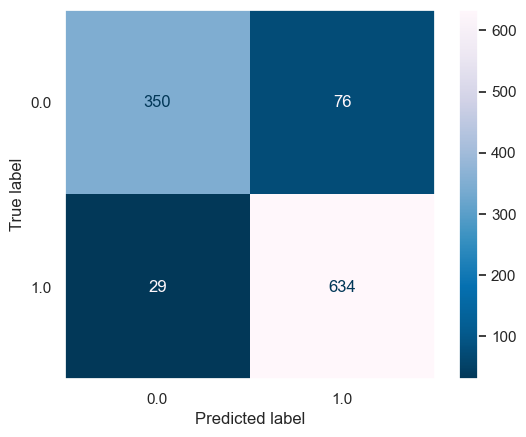

In [573]:
print('------------------Report Train Set------------------')
print(classification_report(y_train_resampled_enc, y_cb_train_pred))

print('\n ------------------Report Test Set------------------')
print(classification_report(y_test_enc, y_cb_test_pred))


# visualisasi confusion matrix
print('Confusion Matrix: \n', ConfusionMatrixDisplay.from_estimator(def_cb, X_test, y_test_enc, cmap='PuBu_r')) #YlOrRd
sns.set_style({'axes.grid': False})

Sebelumnya, telah diketahui bahwa model memiliki tendensi untuk *overfit*. Dari hasil evaluasi tersebut, terlihat bahwa data memiliki hasil f1-score pada data test terhadap mahasiswa `drop-out` sebesar 0.87. Dari nilai-nilai pada tabel maupun plot di atas, dapat dibuat perumpamaan sebagai berikut:
- Dari 426 mahasiswa yang seharusnya termasuk *drop-out*, masih ada 76 diantaranya yang terprediksi aman/ lulus. Hal tersebut dapat menimbulkan resiko, baik bagi mahasiswa itu sendiri; masalahnya tidak terdeteksi sedari dini dan tidak ada bantuan dari institusi, mahasiswa putus sekolah dan `kehilangan akses pendidikan`--atau bisa jadi juga menjadi masalah bagi institut; `reputasi buruk`, salah mempertimbangkan biaya pengeluaran, dan sebagainya.  
- Sementara itu, dari 663 mahasiswa, ada 19 mahasiswa yang terprediksi *drop-out*. Hal ini memang tidak memberikan resiko sebesar poin sebelumnya, namun juga dapat membuat institut kehilangan kepercayaan mahasiswa dan menimbulkan stigma buruk bagi mahasiswa terkait. 

Dalam hal ini, kita mungkin lebih ingin memaksimalkan nilai `recall` (ingin meminimalisir False Negatives) untuk menghindari adanya mahasiswa terindikasi akan *drop-out* yang tidak terdeteksi. Namun kita juga membutuhkan nilai precision yang baik jika institusi ingin menganalisis masing-masing `individu lebih lanjut` dan menangani masalah mereka.

Mengenai keseimbagnan model dalam memprediksi data ditemukan juga adanya ketidakseimbangan antara keakuratan index 0 (*drop-out*) dan 1. Hal ini merupakan hal yang wajar karena memang pada dataset asli kedua kategori tersebut tidak seimbang. Justru, ketidakseimbangan tersebut sudah dibantu diminimalisir dengan penggunaan SMOTE pada bagian pre-processing. 

Secara garis besar, model cukup baik dalam memprediksi dan mengetahui gambaran umum mengenai rasio maupun ciri kelulusan mahasiswa. Namun jika diperlukan tindakan lanjut seperti menghubungi mahasiswa mana yang akan *drop-out* untuk pencegahan, pemberian dukungan, dan sebagainya (yang berhubungan dengan pribadi individu) maka diperlukan analisis lebih dalam lagi mengenai faktor lain yang tidak dapat dilakukan hanya dengan bermodalkan mesin klasifikasi. 

In [576]:
# membuat data frame untuk hasil FPR dan TPR
y_pred_proba = cb_grid.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test_enc, y_pred_proba)

fpr_tpr = pd.DataFrame({'FPR': fpr_rf, 'TPR': tpr_rf})
fpr_tpr

,FPR,TPR
0,0.000000,0.000000
1,0.000000,0.001508
2,0.000000,0.003017
3,0.004695,0.003017
4,0.004695,0.045249
...,...,...
191,0.852113,0.998492
192,0.852113,1.000000
193,0.863850,1.000000
194,0.868545,1.000000


In [577]:
# auc
auc_rf = roc_auc_score(y_test_enc, y_pred_proba)
print('AUC Score: ', auc_rf)

AUC Score:  0.9341855557679914


In [578]:
print('Sum of FPR:',fpr_tpr['FPR'].sum()) #FPR = FP / (FP + TN)
print('Sum of TPR:',fpr_tpr['TPR'].sum()) #TPR = TP / (TP + FN)

Sum of FPR: 34.0093896713615
Sum of TPR: 143.395173453997


Diketahui bahwa nilai AUC mendekati 1 yakni 0.93, yang menandakan bahwa performa model cukup baik dalam memprediksi dan mengategorikan sekumpulan fitur menjadi kategori lulus (index = 1) atau putus sekolah (index = 0).

Pada penjabaran ini diketahui bahwa TPR memiliki jumlah yang lebih tinggi dibandingkan FPR. Hal ini menunjukkan indikasi yang cukup karena hasil prediksi memiliki lebih banyak mendapatkan hasil yang benar atau True Positive. Namun, model tetap memberikan nilai FPR yang juga sangat tinggi yang membuatnya menjadi kurang baik.

Secara garis besar model CatBoost dengan hyperparameter default sudah memiliki performa yang cukup baik dengan akurasi setinggi 90%. Selanjutnya analisis akan dilanjutkan dengan membandingkan kolom data test dengan hasil prediksi.

### Result Analysis

Pada bagian ini akan dilakukan perbandingan dari hasil prediksi terhadap data tes asli.

In [591]:
# membuat menjadi 1 dimensi
y_test_enc = y_test_enc.ravel()  # Flatten the array to make it 1-dimensional
y_cb_test_pred = y_cb_test_pred.ravel()  # Flatten the array to make it 1-dimensional

# membuat dataframe hasil prediksi dan aktual
model_result = pd.DataFrame({
    'Student Status (actual)':y_test_enc,
    'Student Status (pred)':y_cb_test_pred
})
model_result

,Student Status (actual),Student Status (pred)
0,0.0,0.0
1,1.0,1.0
2,0.0,0.0
3,1.0,1.0
4,0.0,0.0
...,...,...
1084,1.0,1.0
1085,1.0,1.0
1086,1.0,1.0
1087,0.0,0.0


In [592]:
# melihat deskripsi model
model_result.describe()

,Student Status (actual),Student Status (pred)
count,1089.000000,1089.000000
mean,0.608815,0.651974
std,0.488240,0.476563
min,0.000000,0.000000
25%,0.000000,0.000000
50%,1.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


In [594]:
print('Actual:',model_result['Student Status (actual)'].sum())
print('Pred:',model_result['Student Status (pred)'].sum())

Actual: 663.0
Pred: 710.0


Jika dilihat dari perbandingan nilai aktual dan prediksi, diketahui bahwa model masih memiliki kekurangan dimana model memiliki tendensi untuk salah memperkirakan index 1 atau mahasiswa lulus yang terlihat dari jumlah index 1 yang seharusnya berjumlah 663 namun justru terdapat 710 prediksi mahasiswa lulus. Model cenderung untuk menanggap bahwa orang yang berkemungkinan putus sekolah untuk mendapatkan *academic success*. 

# X. Model Inference

### Model Save and Load

Dilakukan simulasi save & load model untuk memastikan bahwa file model juga dapat digunakan pada file notebook lain.

In [636]:
df_drop_enroll.to_csv('h8dsft_P1M2_R_Dissa_dropped.csv', index=False)

In [600]:
# menyimpan model
with open('def_cb.pkl', 'wb') as file_1:
  pickle.dump(def_cb, file_1)

with open('num_cols.txt', 'w') as file_2: #df_drop_enroll
  json.dump(num_cols, file_2)

In [602]:
# membuka model
with open('def_cb.pkl', 'rb') as file_1:
  def_cb_inf = pickle.load(file_1)

### Using inference data

Sebelumnya, telah diketahui bahwa set data inference berasal dari dataset asli yang memiliki value 'Enrolled' pada kolom 'Target'. Baris-baris ini tidak disertakan ke dalam model, dan sebagai gantinya justru akan digunakan untuk melihat prediksi mahasiswa yang kini sedang/ masih mengikuti pembelajaran (belum lulus dan belum dropout) apakah memiliki potensi untuk *drop-out* atau tidak. Inferensial ini adalah contoh nyata bagaimana model ini dapat dipakai. 

Dari hasil inferensi ini juga kita dapat melihat deskripsi serta batasan-batasan model dalam menghitung sebuah data akan termasuk *drop-out* atau lulus. Sebelumnya model telah dilatih dengan fitur-fitur yang mungkin memiliki *pattern* tertentu. Namun data 'Enrolled' ini akan menjadi *challenge* karena mahasiswa yang terdaftar pada data ini bisa dibilang masih berada `di tengah-tengah posibilitas lulus atau drop-out`, dan belum menyelesaikan masa pembelajarannya.

In [606]:
# mengambil data yang tadi sudah disingkirkan saat EDA
X_df_inf= df_inf.drop('Target', axis=1)
X_df_inf.head(3)

,Marital status,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Unemployment rate,Inflation rate,GDP
16,1,10,1,1,1,13,28,6,9,1,0,0,1,0,0,18,0,0,6,10,1,12.000000,0,6,14,2,11.000,10.8,1.4,1.74
19,1,16,1,1,1,13,14,8,8,1,0,0,1,0,0,18,0,0,7,7,6,11.666667,0,7,8,6,13.500,16.2,0.3,-0.92
21,1,13,1,1,1,1,28,5,8,1,0,0,1,0,0,20,0,0,7,14,7,11.437500,0,8,9,8,11.425,12.7,3.7,-1.70


In [626]:
# prediksi model
y_inf_pred = def_cb_inf.predict(X_df_inf)

In [630]:
# menggabungkan kolom prediksi dengan kolom yang memiliki fitur
y_inf_pred_df = pd.DataFrame(y_inf_pred, columns=['Student Status (pred)'])

# reset index
y_inf_pred_df.reset_index(inplace=True)
df_inf.reset_index(inplace=True)

# concat
concat_inf = pd.concat([df_inf, y_inf_pred_df], axis=1)
concat_inf.head(10)

,level_0,index,Marital status,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Unemployment rate,Inflation rate,GDP,Target,index,Student Status (pred)
0,0,16,1,10,1,1,1,13,28,6,9,1,0,0,1,0,0,18,0,0,6,10,1,12.000000,0,6,14,2,11.000000,10.8,1.4,1.74,Enrolled,0,0.0
1,1,19,1,16,1,1,1,13,14,8,8,1,0,0,1,0,0,18,0,0,7,7,6,11.666667,0,7,8,6,13.500000,16.2,0.3,-0.92,Enrolled,1,1.0
2,2,21,1,13,1,1,1,1,28,5,8,1,0,0,1,0,0,20,0,0,7,14,7,11.437500,0,8,9,8,11.425000,12.7,3.7,-1.70,Enrolled,2,1.0
3,3,25,1,10,1,1,1,13,28,10,10,1,0,1,1,0,1,18,0,0,6,8,5,11.600000,0,6,12,4,11.000000,7.6,2.6,0.32,Enrolled,3,0.0
4,4,27,1,6,1,1,1,13,14,4,4,1,0,0,1,0,0,18,0,0,5,9,5,12.666667,0,5,7,4,13.000000,9.4,-0.8,-3.12,Enrolled,4,1.0
5,5,29,1,12,1,1,1,3,3,2,11,1,0,0,1,1,0,19,0,0,7,9,6,12.933333,0,7,7,6,13.716667,16.2,0.3,-0.92,Enrolled,5,1.0
6,6,30,1,4,1,14,1,4,5,5,3,0,0,0,1,1,0,21,0,0,6,15,5,11.857143,0,6,17,5,10.571429,16.2,0.3,-0.92,Enrolled,6,1.0
7,7,32,1,9,1,1,1,1,1,5,7,0,0,0,0,1,0,18,0,0,5,9,3,11.333333,0,5,8,2,13.500000,8.9,1.4,3.51,Enrolled,7,0.0
8,8,45,1,17,0,1,1,23,28,5,6,0,0,0,1,0,0,24,0,0,5,9,2,11.500000,0,5,11,3,14.333333,7.6,2.6,0.32,Enrolled,8,0.0
9,9,51,1,12,1,1,1,22,28,7,7,1,0,0,1,0,1,19,0,0,8,10,6,11.833333,0,8,10,6,11.833333,9.4,-0.8,-3.12,Enrolled,9,1.0


Dari deskripsi kolom yang telah digabungkan ini, kita dapat melihat batasan-batasan serta pola data baru yang telah terbentuk.

In [815]:
# membuat variabel untuk menghitung
class_counts = Counter(y_inf_pred)

# menghitung persentase
total_samples = len(y_inf_pred)
Graduate_percentage = class_counts[1] / total_samples * 100
Dropout_percentage = class_counts[0] / total_samples * 100

# print
print('Dropout percentage:', round(Dropout_percentage, 2), '%')
print('Graduate percentage:', round(Graduate_percentage, 2), '%')

Dropout percentage: 49.62 %
Graduate percentage: 50.38 %


Uji data inferensi memberikan hasil perbandingan 50:50 untuk kedua kategori. Model sudah dapat digunakan dengan baik.

# XI. Concept & Conclusion

Pada proyek ini, kami telah membuat model *machine learning* untuk memprediksi tendensi kelulusan mahasiswa. Berikut adalah kesimpulan serta analisis dari proyek ini:

**1. Data Exploration:**
- Telah dilakukan beberapa *eraly feature seelction* pada fitur yang dianggap dapat diwakilkan oleh kolom lainnya
- Terlihat ada hubungan linear antara kolom numerikal
- Kolom-kolom curricular terlihat sangat berkorelasi dengan target, yang ternyata sejalan dan terbuktikan pada bagian feature selection
- Ditemukan ada lebih banyak baris 'Graduated' dibandingkan 'Dropout' dengan perbandingan kurang lebih 5:3. Namun dalam konteks institusi, perbandingan tiga dari delapan mahasiswa putus sekolah sudah merupakan perbandingan yang sangat besar. 
- Demografi mahasiswa pada data mayoritas adalah orang Portugal, lulusan SMA/ sederajat, dan mayoritas orangtuanya bekerja sebagai *unskilled worker*. Sepertinya dataset ini memang menampung data mahasiswa yang berasal dari `perekonomian menengah` hingga menengah ke bawah. Mungkin bila kita menambahkan data, kita akan mendapatkan hasil yang sepenuhnya berbeda.
- Fitur-fitur seperti *nationality*, inflasi, GDP, unemployment rate, dan hal-hal yang berhubungan dengan makro ekonomi setempat, tidak begitu berkorelasi dengan target
- Mahasiswa dengan beasiswa memiliki kemungkinan lulus yang lebih tinggi. 


**2. Model Analysis:**

- Model terbaik yang dipilih berdasarkan alur default > grid search adalah default Catboost. Kondisi dimana model default menjadi pertimbangan model yang lebih baik mungkin saja terjadi karena grid akan mencari parameter terbaik berdasarkan hasil evaluasi secara keseluruhan, sementara keputusan akhir perlu mempertimbangkan beberapa metrik dan perhitungan seperti *standard deviation* dari f1-score dan sebagainya.
- Jika dilihat berdasarkan perbandingan train dan test, model train memiliki nilai akurasi 95% sementara model test memiliki akurasi 90%. Hal ini dapat mengindikasikan model yang sedikit *overfit*. `Catboost seharusnya dapat menangani overfitting` (dan memang terbukti lebih baik dibandingkan Decision Tree), namun model kami masih memiliki indikasi overfitting. Hal ini sepertinya terjadi karena data yang kami gunakan cukup sedikit, sementara CatBoost lebih cocok untuk data berukuran besar
- Hasil evaluasi model memberikan nilai yang yang tidak seimbang antara prediksi indeks 0 dan 1. Hal ini diakibatkan karena dataset memiliki ketidakseimbangan antara dua klasifikasi tersebut. Walaupun begitu, sebelumnya telah dilakukan *over sampling* menggunakan SMOTE, sehingga hasil yang didapatkan ini mungkin sudah cukup optimal. 
- Model final memberikan prediksi lebih baik karena dapat menghandle non-linearitas

**3. Education Domain:**

Prediksi yang salah dari model untuk memprediksi keberhasilan akademik atau *drop-out* mahasiswa dapat memiliki dampak yang serius. Berikut ini adalah beberapa analisis resiko serta kekurangan dari model:
- Keterbatasan data: Model sangat bergantung pada kualitas data yang digunakan untuk pelatihan. Telah kita ketahui sebelumnya apda bagian EDA bahwa memang data yang diambil berpusat pada demografi mahasiswa tertentu (berasal dari Portugal, perekonommian menengah ke bawah). Jika data yang digunakan tidak representatif atau tidak mencerminkan populasi mahasiswa secara akurat.
- Implikasi sosial dan psikologis: Kesalahan prediksi yang signifikan dapat memiliki implikasi sosial dan psikologis yang bagi mahasiswa dan lingkungan mereka. Misalnya, jika seorang mahasiswa yang sebenarnya berpotensi akan lulus dan sukses diprediksi sebagai calon *drop-out*, hal ini dapat menyebabkan stigmatisasi dan `pengabaian terhadap potensi mahasiswa` tersebut. Sebaliknya, jika seorang mahasiswa yang sebenarnya merupakan calon *drop-out* namun dianggap akan lulus, hal ini dapat merugikan `instansi yang akan berhubungan dengan mahasiswa` tersebut bila terjadi salah pendataan. Selain itu juga, untuk mahasiswa itu sendiri, bisa jadi ia sedang membutuhkan bantuan (baik secara finansial, mental, edukasi, dan sebagainya) namun karena tidak terdeteksi oleh institut, kita tidak dapat `mencegah` kegagalan mahasiswa tersebut. 
- Pengaruh keputusan dan tindakan: Kesalahan prediksi yang signifikan dapat berdampak pada keputusan dan tindakan yang diambil oleh lembaga pendidikan atau pihak terkait. Jika ada keputusan mengenai pengalokasian dana atau perencanaan biaya untuk jumlah mahasiswa yang salah, hal ini dapat menyebabkan kerugian bagi pihak terkait. 
- Bias dan diskriminasi: Model prediktif dapat mencerminkan bias atau diskriminasi yang ada dalam data pelatihan. Jika model tersebut memberikan prediksi yang diskriminatif terhadap `kelompok-kelompok tertentu`, hal ini dapat memperburuk kesenjangan pendidikan dan sosial yang ada.

Meskipun ada resiko yang terkait dengan penggunaan model ini, ada juga kegunaan dan kelebihan yang dapat dihadirkan:
- Identifikasi potensi mahasiswa yang membutuhkan bantuan: Model ini dapat membantu mengidentifikasi mahasiswa yang beresiko *drop-out* atau memiliki kesulitan akademik. Hal ini dapat memungkinkan lembaga pendidikan untuk mengambil langkah-langkah `pencegahan atau memberikan dukungan` tambahan kepada mahasiswa-mahasiswa ini.
- Pengalokasian sumber daya yang efektif: Dengan menggunakan model ini, lembaga pendidikan dapat lebih efisien dalam mengalokasikan sumber daya yang terbatas. Misalnya, program intervensi atau dukungan tambahan dapat diarahkan secara tepat kepada mahasiswa-mahasiswa yang membutuhkannya.
- Pengembangan strategi pendidikan yang lebih efektif: Melalui analisis prediksi model, lembaga pendidikan dapat mengidentifikasi `faktor-faktor yang berkontribusi` terhadap keberhasilan akademik atau *drop-out* mahasiswa. Hal ini dapat membantu dalam pengembangan `strategi pendidikan` yang lebih efektif dan program-program yang sesuai.
- Evaluasi dan perbaikan sistem pendidikan: Dengan menggunakan model ini, lembaga pendidikan dapat melakukan evaluasi terhadap sistem pendidikan mereka. Prediksi yang diperoleh dapat memberikan wawasan tentang faktor-faktor yang memengaruhi keberhasilan mahasiswa secara keseluruhan, sehingga dapat memberikan dasar untuk perbaikan dan perubahan dalam sistem pendidikan.

Secara kesimpulan model ini sangat baik untuk melihat gambaran umum mengenai pendidikan disuatu tempat (`preventing dan handling`). Namun untuk penanganan mahasiswa secara pribadi, tentu akan diperlukan analisis lebih dalam lagi mengenai individu tersebut. Karena bisa jadi, ada faktor lainnya yang dapat menyebabkan kegagalan mahasiswa tidak tercatat dalam dataset.
Model ini dapat berguna di berbagai bidang, termasuk pendidikan, kebijakan pendidikan, analisis data pendidikan, serta penelitian pendidikan.

**5. Further Improvement:**

- Model dapat mencoba menyaring fitur-fitur yang lebih relevan. Dalam proyek ini, karena model yang akan digunakan adalah beberapa model, pemilihan fitur mungkin menjadi kurang fokus sehingga tidak tersaring dengan baik. Untuk selanjutnya, selektor yang akan dipakai juga harusnya lebih sesuai dan berfokus pada model yang ingin dilatih (dapat juga menggunakan feature importance build-in).

- Dapat melakukan penanganan lain seperti handling cardinality atau menggunakan *scaler* dan *outlier handler* yang lebih sesuai. 

- Perluasan interval GridSearchCV, menggunakan teknik CV lain, ataupun melakukan two-step parameter search dengan RandomSearchCV jika memang memori dan waktu yang dimiliki terbatas. 

- Dapat dilakukan percobaan untuk model klasifikasi lainnya yang belum dicoba. 